---
# **Visualización de Datos**
# **Loan Data - Riesgo de Crédito Retail**
---

Creado por: **V. D. Betancourt**

>💡 *The purpose of visualization is insight, not pictures.*
―Ben Shneiderman



# **Índice**




* [1. Introducción](#1)

    
* [2. Settings](#2)


* [3. Preprocessing](#3)


* [4. Análisis Exploratorio de Datos (EDA)](#4)


* [5. Data Visualization](#5)


* [6. Conclusiones](#6)



* [7. Bibliografía](#7)




---
<a id="1"></a>
# **Introducción**
---

## 🎯 Objetivo

El objetivo del presente notebook consiste en aplicar distintas herramientas de **visualización de datos** a un dataset específico, relativo a ***préstamos crediticios (loan data)***.

El dataset es apropiado para realizar un análisis mucho más detallado sobre lo que se conoce como ***Riesgo de Crédito de Consumo (Retail)***. Sin embargo, el tema de Riesgos es muy amplio, y entrar en los pormenores queda fuera del alcance de este trabajo.

## 🎨 State of the Art

El **Riesgo de Crédito** es una preocupación central para las instituciones financieras, ya que se refiere a la posibilidad de que un prestatario no cumpla con sus obligaciones de pago. Evaluar y gestionar adecuadamente este riesgo es crucial para mantener la estabilidad financiera y minimizar las pérdidas potenciales.

Los ***modelos de Probabilidad de Incumplimiento (PD)*** son herramientas estadísticas empleadas para predecir la probabilidad de que un prestatario incumpla sus compromisos crediticios. Estos modelos ayudan a las instituciones financieras a evaluar el riesgo de crédito, asignar recursos de manera efectiva y establecer políticas crediticias apropiadas.

Existen varios tipos de modelos de PD, entre ellos los de ***Originación***, ***Behavioral*** y ***Collection***. Los ***modelos de Originación*** se aplican durante el proceso de otorgamiento de créditos para determinar si un solicitante califica para un préstamo. Los ***modelos Behavioral***, por otro lado, se enfocan en el comportamiento del cliente después de la originación del crédito y buscan identificar patrones que puedan indicar un mayor riesgo de incumplimiento. Por último, los ***modelos de Collection*** se utilizan para optimizar las estrategias de recuperación y asignación de recursos en el caso de clientes morosos.



Los **Acuerdos de Basilea**, establecidos por el Comité de Supervisión Bancaria de Basilea (BCBS) del ***Banco de Pagos Internacionales (BIS)***, son un conjunto de regulaciones y estándares internacionales que buscan fortalecer la estabilidad financiera y la solidez de las instituciones bancarias. Estos acuerdos proporcionan un marco común para evaluar y gestionar el riesgo de crédito, abarcando desde Basilea I hasta Basilea III, cada uno con un enfoque más sofisticado y riguroso en la gestión de riesgos.

Los ***modelos de riesgo de crédito***, incluyendo los modelos de Probabilidad de Incumplimiento (PD), Originación, Behavioral y Collection, están en gran medida influenciados por estos acuerdos. Las directrices de Basilea obligan a las instituciones financieras a utilizar modelos internos y metodologías estandarizadas para medir y gestionar el riesgo de crédito de manera más efectiva. El énfasis en la gestión de riesgos en los Acuerdos de Basilea ha impulsado a los bancos a adoptar e implementar modelos de riesgo de crédito robustos y basados en datos.

La adopción de estos modelos permite a las instituciones financieras cumplir con las exigencias regulatorias y al mismo tiempo mejorar su capacidad para identificar, evaluar y mitigar el riesgo de crédito. Además, el ***marco regulatorio de Basilea*** fomenta la transparencia y la consistencia en la medición y reporte de riesgos, lo que facilita la comparación y supervisión de las instituciones financieras a nivel mundial. En este contexto, los modelos de riesgo de crédito y las prácticas de visualización de datos adquieren aún más relevancia, ya que ayudan a las instituciones a cumplir con las regulaciones y a tomar decisiones informadas basadas en un entendimiento profundo de los riesgos asociados a sus carteras crediticias.

La **Visualización de Datos** juega un papel importante en la gestión del riesgo de crédito al facilitar la comprensión de patrones y tendencias subyacentes en los datos. Un ejemplo de esto es la visualización de la concentración geográfica de cartera con atrasos o con alta probabilidad de incumplimiento en un mapa. Esta representación permite a las instituciones financieras identificar áreas de mayor riesgo y concentración de incumplimientos, lo que puede informar las decisiones sobre la asignación de recursos, la diversificación de la cartera y la implementación de estrategias preventivas.




---
<a id="2"></a>
# ⚙️ **Settings**
---

## Importar Librerías

In [ ]:
# Importar lo Básico
import pandas as pd
import io
import requests
import timeit
from google.colab import files
import numpy as np
from datetime import datetime


In [ ]:
# Importar Matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [ ]:
# Importar Seaborn
import seaborn as sns

In [ ]:
# Geopandas
!pip install geopandas
import geopandas as gpd

!pip install earthpy
import earthpy as et

!pip install shapely
import shapely

import fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 53.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 44.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#

In [ ]:
# Importar Plotly y Plotly Express


In [ ]:
# Importar Dash


## Importar Dataset

El **dataset** consiste en un archivo separado por comas (CSV) llamado **`loan_data_2007_2014.csv`**, el cual, originalmente podía encontrarse en el siguiente repositorio: [Kaggle_LoanData](https://www.kaggle.com/wendykan/lending-club-loan-data/version/1)

⚠️ **Warning!**

Este dataset consta de **`228MB`**, por lo cual, se recomienda almacenarlo en un store tipo **Google Drive**. De lo contrario, si sólo se carga a nivel raíz en **Google Colab**, cada vez que comience a trabajar con el notebook, habrá que invertir entre 15-30min en dicha carga.

A continuación, también se proporciona un link alternativo para su descarga desde Google Drive: [Loan_Data](https://drive.google.com/file/d/1Cbu0dWNOc3fVTotdUHdEiiF6B3pdOdE0/view?usp=share_link).

In [ ]:
# Conexión a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar Dataset desde Google Drive
loan_data_backup = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv', header=0, encoding='UTF-8')


<ipython-input-6-d52f2438feed>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv', header=0, encoding='UTF-8')


In [ ]:
# Crear Backup
loan_data = loan_data_backup.copy()


## Importar Mapa

Para obtener los data geográficos del mapa de Estados Unidos (USA), se precisa del siguiente fichero:

*  [cb_2018_us_state_500k.shp](https://drive.google.com/file/d/13t3F3ZGaOBHEjLLU0YkFF0kcL05rBSWI/view?usp=sharing)

In [ ]:
# Geopandas
# Datos de Mapa de USA
# cb_2018_us_state_500k.shp
mapa_usa = gpd.read_file("/content/drive/MyDrive/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")


---

---
<a id="3"></a>
# **Preprocessing**
---

## 🧮 Información del Dataset

>💡 *In God we trust, all others bring data.*
―Edwards Deming, Statistician

### Dataset Completo

In [ ]:
# Head
loan_data.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Forma del Dataset**

Debe tenerse un dataset con:

*  $466,285$ Filas/Rows/Registros

*  $75$ Columnas/Características/Atributos/Variables/Features


In [ ]:
# Forma (Filas, Columnas)
loan_data.shape

(466285, 75)

In [ ]:
# Columnas
#loan_data.columns.values

In [ ]:
# Tipo de Datos
#loan_data.dtypes

**Información por Variable**

In [ ]:
# Información
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### Variables Numéricas y No Numéricas

In [ ]:
# Variables Numéricas
# Selecciona todas las columnas numéricas
numeric_cols = loan_data.select_dtypes(include=[float, int]).columns.tolist()

# Cuenta cuántas variables numéricas y cuántas no lo son
num_numeric_cols = len(numeric_cols)
num_other_cols = len(loan_data.columns) - num_numeric_cols

# Imprime la lista de variables numéricas y el recuento de variables
#print("Lista de variables numéricas:", numeric_cols)
print("Número de variables numéricas:", num_numeric_cols)
print("Número de variables que no son numéricas:", num_other_cols)


Número de variables numéricas: 53
Número de variables que no son numéricas: 22


### Variables Numéricas

In [ ]:
# Subconjunto de Variables Numéricas
loan_data_numeric = loan_data.select_dtypes(include=[np.number])


In [ ]:
# Forma (Filas, Columnas)
loan_data_numeric.shape

(466285, 53)

In [ ]:
# Información
loan_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   annual_inc                   466281 non-null  float64
 9   dti                          466285 non-null  float64
 10  delinq_2yrs                  466256 non-null  float64
 11  inq_last_6mths               466256 non-null  float64
 12  mths_since_last_delinq       215934 non-null  float64
 13 

In [ ]:
# Nombres Variables Numéricas
numeric_cols = loan_data_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv'
 'int_rate' 'installment' 'annual_inc' 'dti' 'delinq_2yrs'
 'inq_last_6mths' 'mths_since_last_delinq' 'mths_since_last_record'
 'open_acc' 'pub_rec' 'revol_bal' 'revol_util' 'total_acc' 'out_prncp'
 'out_prncp_inv' 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp'
 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_amnt' 'collections_12_mths_ex_med'
 'mths_since_last_major_derog' 'policy_code' 'annual_inc_joint'
 'dti_joint' 'verification_status_joint' 'acc_now_delinq' 'tot_coll_amt'
 'tot_cur_bal' 'open_acc_6m' 'open_il_6m' 'open_il_12m' 'open_il_24m'
 'mths_since_rcnt_il' 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m'
 'max_bal_bc' 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl'
 'inq_last_12m']


### Variables No Numéricas

In [ ]:
# Subconjunto de Variables No Numéricas
loan_data_non_numeric = loan_data.select_dtypes(exclude=[np.number])


In [ ]:
# Forma (Filas, Columnas)
loan_data_non_numeric.shape

(466285, 22)

In [ ]:
# Información
loan_data_non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 466285 non-null  object
 1   grade                466285 non-null  object
 2   sub_grade            466285 non-null  object
 3   emp_title            438697 non-null  object
 4   emp_length           445277 non-null  object
 5   home_ownership       466285 non-null  object
 6   verification_status  466285 non-null  object
 7   issue_d              466285 non-null  object
 8   loan_status          466285 non-null  object
 9   pymnt_plan           466285 non-null  object
 10  url                  466285 non-null  object
 11  desc                 125983 non-null  object
 12  purpose              466285 non-null  object
 13  title                466265 non-null  object
 14  zip_code             466285 non-null  object
 15  addr_state           466285 non-nu

In [ ]:
# Nombres Variables No Numéricas
non_numeric_cols = loan_data_non_numeric.columns.values
print(non_numeric_cols)

['term' 'grade' 'sub_grade' 'emp_title' 'emp_length' 'home_ownership'
 'verification_status' 'issue_d' 'loan_status' 'pymnt_plan' 'url' 'desc'
 'purpose' 'title' 'zip_code' 'addr_state' 'earliest_cr_line'
 'initial_list_status' 'last_pymnt_d' 'next_pymnt_d' 'last_credit_pull_d'
 'application_type']


## 🥷 Data Wrangling

>💡 *Wrangling data is like interrogating a prisioner. Just because you wrangled a confession doesn't mean you wrangled the answer.*
―Brad Scheinder, Nomad Data's CEO

Actualizar subconjunto de variables numéricas y no numéricas, por cualquier cambio que se haya realizado en el dataframe: **`loan_data`**.

In [ ]:
# Actualizar Variables Numéricas
loan_data_numeric = loan_data.select_dtypes(include=[np.number])

In [ ]:
# Actualizar Variables No Numéricas
loan_data_non_numeric = loan_data.select_dtypes(exclude=[np.number])

### Transformación de Variables Continuas





**Employment Length (`emp_length`)**

Antigüedad laboral

Es una variable que combina un valor numérico con un texto. Es recomendable efectuar una transformación en variable numérica.

In [ ]:
# Variable "Antigüedad Laboral" = emp_length
# Mostrar sus valores únicos
loan_data['emp_length'].unique()


array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
# Creación de nueva variable: emp_length_int

# La variable 'emp_length int' será igual a la variable 'employment length' pero sin el string 'years'
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')

# Se reemplaza la cadena ‘less than 1 year’ con el string ‘0’.
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))

# Se reemplazan los 'n/a' con el string '0'
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))

# Se reemplaza el string ‘space years’ con nada
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')

# Se reemplaza el string ‘space year’ con nada
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

<ipython-input-26-02b7579b867b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [ ]:
# Revisar el tipo de datos: String

type(loan_data['emp_length_int'][0])

str

In [ ]:
# Transformar los valores a numéricos

loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [ ]:
# Revisar el tipo de datos de un elemento

type(loan_data['emp_length_int'][0])

numpy.float64

In [ ]:
# Valores únicos
loan_data['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

### Transformación de Variables Discretas

**Grade (`grade`)**

Calificación crediticia

La ***nomenclatura*** "universal" para las calificaciones crediticias son letras: A, B, C, etc. Se recomienda transformar esta variable a numérica.

En general, la ***descripción*** por calificación:

*  A = Muy bueno

*  B = Bueno

*  C = Regular

*  D, E, F, G = Default (impago)

Estas calificaciones están asociadas (siempre) a un ***porcentaje de Reservas*** que el Banco deberá provisionar por cada préstamo. Y el total del monto de Reservas tiene un impacto en el ***Capital*** del Banco. Esa es la razón por la cual, los Bancos buscarán tener menos reservas, lo que significa que la calificación de los préstamos debería encontrarse entre A, B y a lo mucho en C.

In [ ]:
# Valores Únicos
loan_data.grade.unique()


array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

**Subgrade (`sub_grade`)**



La ***subcalificación*** es una subcategoría que depende de la calificación crediticia, puediendo ser letras y números como: A1, B1, etc.

No es tan común tener Grade y Subgrade al mismo tiempo (salvo quizás en Bancos de USA). Generalmente, en muchos bancos, lo que se toma como "***Calificación***" es lo que este dataset llama "***Subgrade***".

Y para poder trabajar mejor con esta variable, se recomienda convertirla a numérica.

In [ ]:
# Valores Únicos
loan_data.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

### Crear Nuevas Características



**Earliest Credit Line (`earliest_cr_line`)**

Línea de Crédito más reciente

La variable **`earliest_cr_line`** es una dato de fecha, pero su tipo de dato en el dataset es: `object`.

Se transformará a tipo de dato fecha. Y se crearán 2 nuevas características:

*  **`earliest_cr_line_date`**

*  **`mths_since_earliest_cr_line`**

In [ ]:
# Mostrar la columna

loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

Se crea la variable:

*  **`earliest_cr_line_date`**




In [ ]:
# Extraer la fecha y hora de la variable que está en un formato dado

loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')


In [ ]:
# Revisar el tipo de dato de un elemento

type(loan_data['earliest_cr_line_date'][0])


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Calcular la diferencia entre 2 fechas y horas

pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

Se hará la suposición de que el **"Momento Actual" = Diciembre 2017**.

Luego, se calcula la diferencia entre las 2 fechas en meses, cambiando a tipo de dato numérico y redondeando.

Finalmente, se crea la nueva característica:

*  **`mths_since_earliest_cr_line`**

In [ ]:
# Nueva Característica
# mths_since_earliest_cr_line

loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))


In [ ]:
# Mostrar la Estadística Descriptiva para los valores de la columna (creada en la celda anterior)
# Las fechas de 1969 y anteriores no fueron convertidas correctamente, es decir, han llegado a 2069 y similar,
# y se han calculado diferencias negativas

loan_data['mths_since_earliest_cr_line'].describe()


count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
# Tomar 3 columnas del dataframe
# Mostrar únicamente las filas en donde una variable tiene valores negativos
# Hay 2303 valores negativos raros

loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [ ]:
# Ponemos/cambiamos al valor máximo a las filas que hayan tenido diferencias negativos

loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

<ipython-input-40-89cb2422049f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [ ]:
# Calcular y mostrar el Valor Mínimo de una columna

min(loan_data['mths_since_earliest_cr_line'])

73.0

## 🧹 Data Cleaning

>💡 *No data is clean, but most is useful.*
―Dean Abbott, SmarterHQ Co-founder

Actualizar subconjunto de variables numéricas y no numéricas, por cualquier cambio que se haya realizado en el dataframe: **`loan_data`**.

In [ ]:
# Actualizar Variables Numéricas
loan_data_numeric = loan_data.select_dtypes(include=[np.number])

In [ ]:
# Actualizar Variables No Numéricas
loan_data_non_numeric = loan_data.select_dtypes(exclude=[np.number])

### Missing Values

In [ ]:
# Missing Values
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,False,False,False
466281,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,False,False,False
466282,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,False,False,False
466283,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,False,False,False


In [ ]:
# Buscar Missing values (si es que hay)
pd.isnull(loan_data).any()


Unnamed: 0                     False
id                             False
member_id                      False
loan_amnt                      False
funded_amnt                    False
                               ...  
total_cu_tl                     True
inq_last_12m                    True
emp_length_int                  True
earliest_cr_line_date           True
mths_since_earliest_cr_line     True
Length: 78, dtype: bool

In [ ]:
# Contar Missing Values
pd.isnull(loan_data).sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
                                ...  
total_cu_tl                    466285
inq_last_12m                   466285
emp_length_int                  21008
earliest_cr_line_date              29
mths_since_earliest_cr_line        29
Length: 78, dtype: int64

### Datos No Informativos


Si una característica posee demasiadas filas con el mismo valor, entonces se dice que es un ***dato innecesario*** o que la característica ***no es informativa***.

Para poder determinarlo, una opción consiste en crear una lista de características con un alto porcentaje del mismo valor.

A continuación, se muestran las características con más del 95% de filas que tienen el mismo valor.

In [ ]:
# Datos No Informativos / Repetidos
# Variables/Características/Atributos con más del 95% de filas/registros con mismo valor

num_rows = len(loan_data.index)
low_information_cols = [] #

for col in loan_data.columns:
    cnts = loan_data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

pymnt_plan: 99.99807%
n    466276
y         9
Name: pymnt_plan, dtype: int64

total_rec_late_fee: 97.70998%
0.000000     455607
15.000000      2223
30.000000       285
45.000000        50
16.840000        15
              ...  
15.026894         1
23.190501         1
14.959976         1
37.751380         1
41.150000         1
Name: total_rec_late_fee, Length: 5808, dtype: int64

collection_recovery_fee: 95.02322%
0.0000      443079
2.0000          18
1.8000          13
1.8800          12
1.2000          12
             ...  
330.4404         1
149.1210         1
2.9795           1
8.8326           1
11.5940          1
Name: collection_recovery_fee, Length: 20275, dtype: int64

collections_12_mths_ex_med: 99.12950%
0.0     462226
1.0       3665
2.0        219
NaN        145
3.0         19
4.0          7
6.0          1
16.0         1
20.0         1
5.0          1
Name: collections_12_mths_ex_med, dtype: int64

policy_code: 100.00000%
1    466285
Name: policy_code, dtype: int64

applicati

Habrá que examinar estas variables una por una para determinar si son informativas o no.

Es necesario entender las razones detrás de la característica repetitiva. Cuando pueda concluirse que son no informativos, entonces se procederá a descartarlas.



---
<a id="4"></a>
# 🔍 **Análisis Exploratorio de Datos (EDA)**
---

>💡 *Without data you’re just another person with an opinion.*
―Edwards Deming, Statistician

El **Exploratory Data Analysis (EDA)** o **Análisis Exploratorio de Datos**, es una técnica utilizada en la estadística y en la ciencia de datos para analizar y comprender los datos, antes de aplicar técnicas más avanzadas de modelado y análisis.

El ***objetivo del EDA*** es descubrir patrones, tendencias, relaciones y anomalías en los datos, lo que puede ayudar a los científicos de datos a formular hipótesis y a tomar decisiones informadas sobre cómo procesar, modelar y analizar los datos.

## Resumen Estadístico

In [ ]:
# Resumen Estadístico
loan_data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,mths_since_earliest_cr_line
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0,445277.000000,466256.000000
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN,5.993330,242.385374
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN,3.627044,86.460310
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000,73.000000
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN,3.000000,184.000000
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN,6.000000,226.000000
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN,10.000000,285.000000
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN,10.000000,587.000000


Actualizar subconjunto de variables numéricas y no numéricas, por cualquier cambio que se haya realizado en el dataframe: **`loan_data`**.

In [ ]:
# Actualizar Variables Numéricas
loan_data_numeric = loan_data.select_dtypes(include=[np.number])

In [ ]:
# Actualizar Variables No Numéricas
loan_data_non_numeric = loan_data.select_dtypes(exclude=[np.number])

In [ ]:
# Subconjunto No-Nulos Variables Numéricas

# Cuenta el número de valores nulos en cada columna
null_counts = loan_data_numeric.isnull().sum()

# Selecciona las columnas con cero valores no nulos
zero_null_columns = null_counts[null_counts == 0].index.tolist()

# Crea un subconjunto de las columnas seleccionadas
loan_data_numeric_sub = loan_data_numeric[zero_null_columns]


In [ ]:
# Información
loan_data_numeric_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               466285 non-null  int64  
 1   id                       466285 non-null  int64  
 2   member_id                466285 non-null  int64  
 3   loan_amnt                466285 non-null  int64  
 4   funded_amnt              466285 non-null  int64  
 5   funded_amnt_inv          466285 non-null  float64
 6   int_rate                 466285 non-null  float64
 7   installment              466285 non-null  float64
 8   dti                      466285 non-null  float64
 9   revol_bal                466285 non-null  int64  
 10  out_prncp                466285 non-null  float64
 11  out_prncp_inv            466285 non-null  float64
 12  total_pymnt              466285 non-null  float64
 13  total_pymnt_inv          466285 non-null  float64
 14  tota

In [ ]:
# Columnas
loan_data_numeric_sub.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'int_rate', 'installment', 'dti', 'revol_bal',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code'],
      dtype='object')

In [ ]:
# Explorar valores únicos
#loan_data_numeric_sub['policy_code'].unique()

## Histogramas

<ipython-input-55-1a48a99c210f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


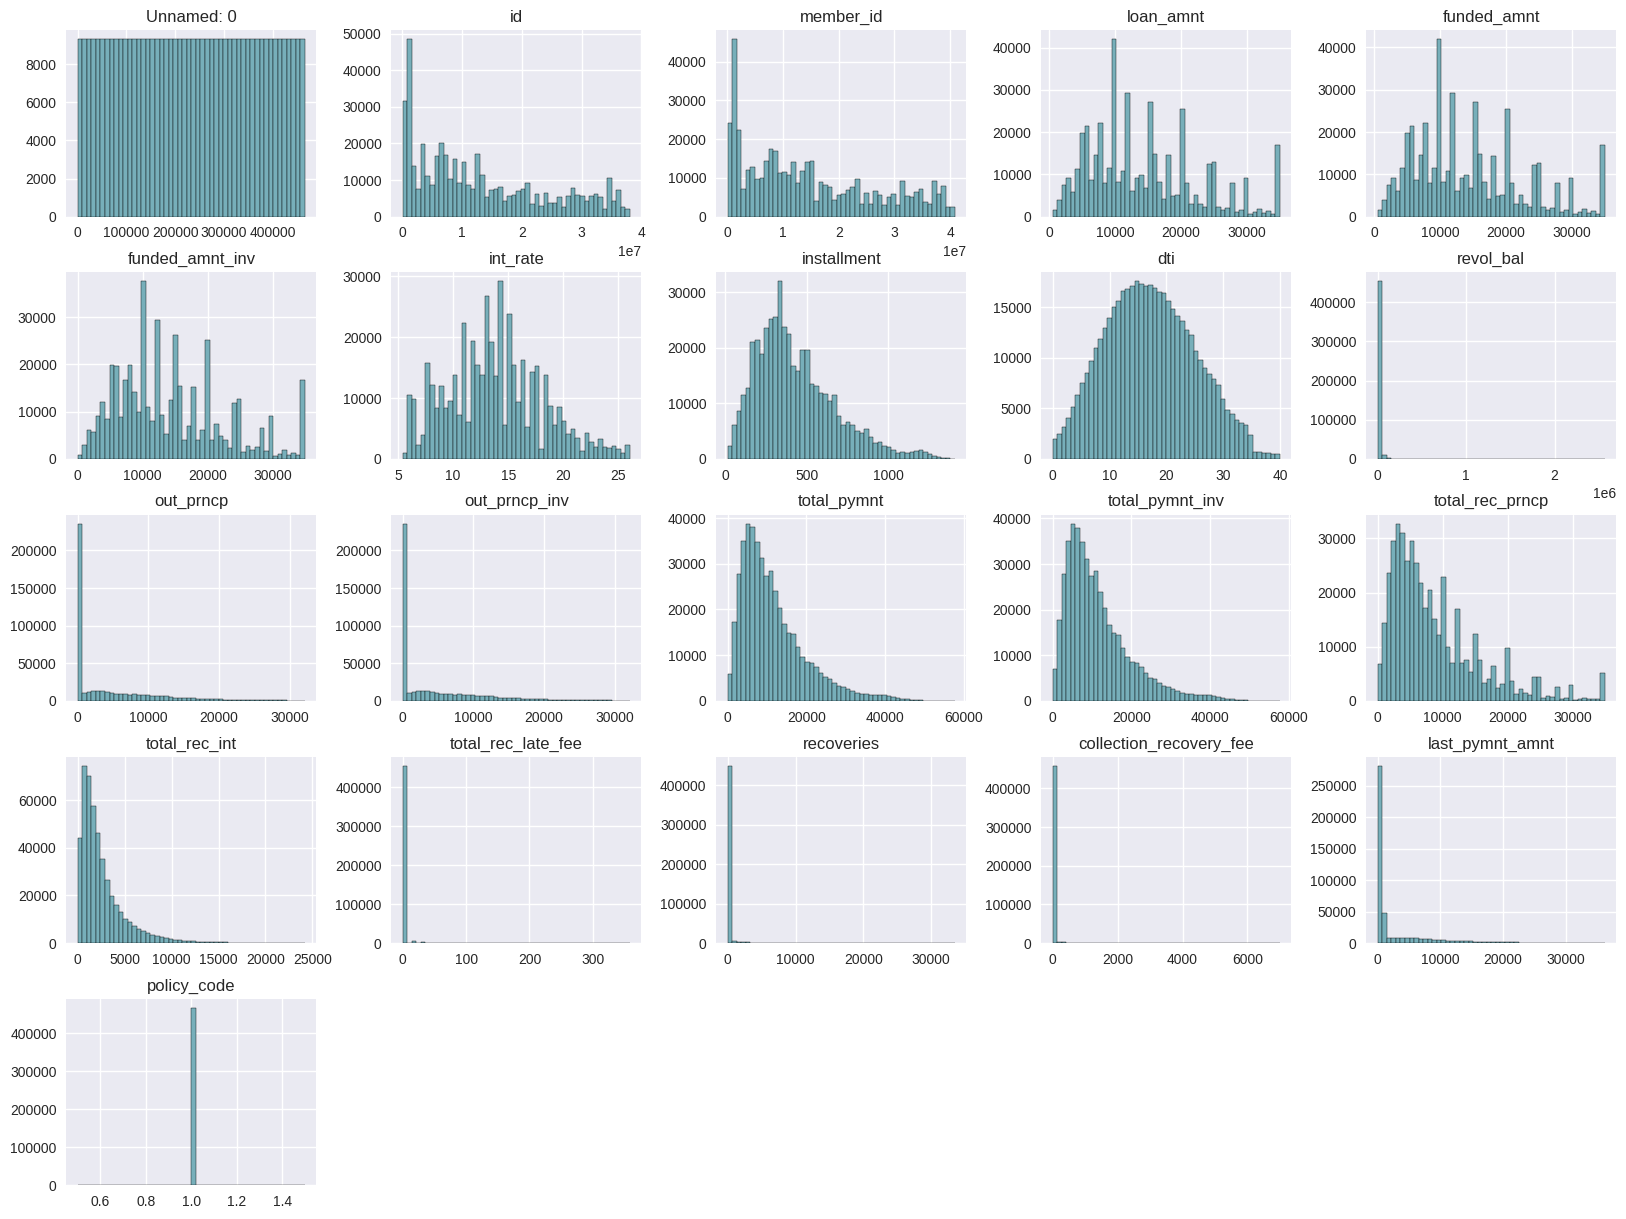

In [ ]:
# Histograma

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Utilizar 50 bins y un tamaño de figura de 20x15 pulgadas.
loan_data_numeric_sub.hist(bins=50, figsize=(20,15), color='#77afba', edgecolor='black')

# Mostrar el histograma resultante.
plt.show()

## Bar Charts

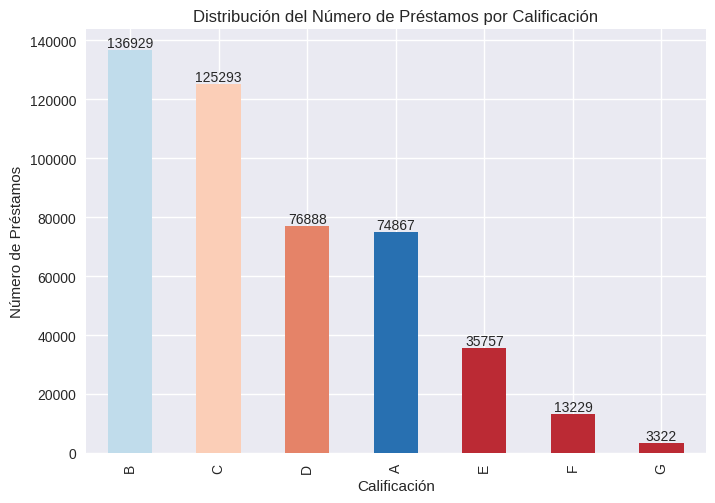

In [ ]:
# Bar Chart
#import matplotlib.pyplot as plt

# Definir un diccionario que asigne colores a cada letra de la variable 'grade'
color_dict = {'A': '#2870B1', 'B': '#C0DCEB', 'C': '#FBCEB7', 'D': '#E58368',
              'E': '#BB2A34', 'F': '#BB2A34', 'G': '#BB2A34'}

# Crea el gráfico de barras con los colores personalizados
counts = loan_data['grade'].value_counts()
ax = counts.plot.bar(color=[color_dict.get(x) for x in counts.index])

# Agrega título y etiquetas de eje
ax.set_title("Distribución del Número de Préstamos por Calificación")
ax.set_xlabel("Calificación")
ax.set_ylabel("Número de Préstamos")

# Agrega etiquetas a cada barra
for i, val in enumerate(counts):
    ax.annotate(str(val), xy=(i, val), ha='center', va='bottom')

plt.show()


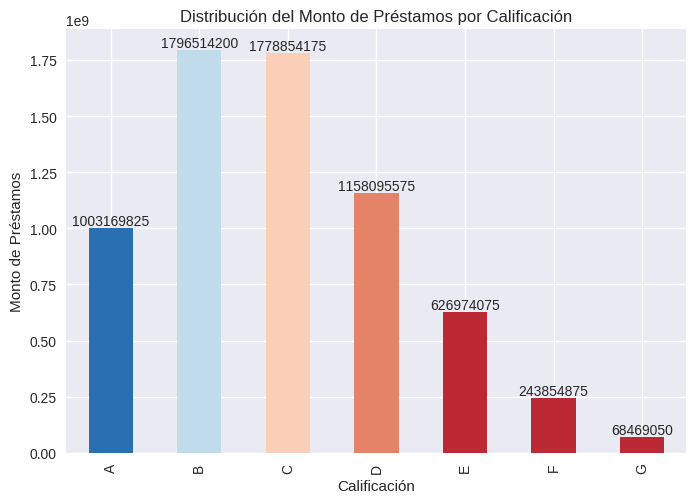

In [ ]:
# Bar Chart
#import matplotlib.pyplot as plt

# Definir un diccionario que asigne colores a cada letra de la variable 'grade'
color_dict = {'A': '#2870B1', 'B': '#C0DCEB', 'C': '#FBCEB7', 'D': '#E58368',
              'E': '#BB2A34', 'F': '#BB2A34', 'G': '#BB2A34'}

# Agrupa los datos por la variable "grade" y suma los montos de préstamo
loan_amnt_by_grade = loan_data.groupby('grade')['loan_amnt'].sum()

# Crea una lista de colores utilizando el diccionario y la variable 'grade'
colors = loan_amnt_by_grade.index.map(color_dict.get)

# Crea el gráfico de barras con los colores personalizados
ax = loan_amnt_by_grade.plot.bar(color=colors)

# Agrega título y etiquetas de eje
ax.set_title("Distribución del Monto de Préstamos por Calificación")
ax.set_xlabel("Calificación")
ax.set_ylabel("Monto de Préstamos")

# Agrega etiquetas a cada barra
for i, val in enumerate(loan_amnt_by_grade):
    ax.annotate("{:.0f}".format(val), xy=(i, val), ha='center', va='bottom')

plt.show()


---
<a id="5"></a>
# 📊 **Data Visualization**
---

>💡 *The greatest value of a picture is when it forces us to notice what we never expected to see.*
―John Tukey



En esta sección se mostrarán las visualizaciones generadas con distintas herramientas o tecnologías, tales como:

*  [Seaborn](https://seaborn.pydata.org/)

*  [Geopandas](https://geopandas.org/en/stable/about.html)

*  [Plotly](https://plotly.com/)

*  [Plotly Express](https://plotly.com/python/plotly-express/)

*  [Dash](https://dash.plotly.com/)

## Seaborn

![](https://raw.githubusercontent.com/vbleal/08MBID---Visualizacion-de-Datos/main/TP/Imag/Seaborn/Seaborn_logo.png)

### Distribuciones Multivariadas

#### Pairplot

Un [Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) en [Seaborn](https://seaborn.pydata.org/index.html) es un gráfico que permite visualizar la ***relación entre múltiples variables*** en un conjunto de datos mediante la creación de una matriz de gráficos de dispersión (scatter plots) y histogramas

El ***pairplot*** es especialmente útil para la exploración inicial de datos y para la identificación de patrones o relaciones entre múltiples variables en un conjunto de datos. En [Seaborn](https://seaborn.pydata.org/index.html), la función **`pairplot()`** permite personalizar el gráfico de diversas maneras, incluyendo la selección de diferentes tipos de gráficos, la adición de anotaciones y la selección de diferentes paletas de colores.

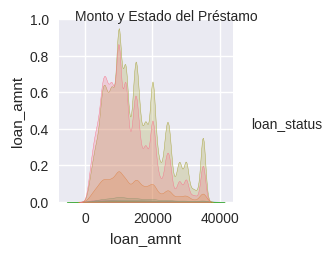

In [ ]:
# Pairplot y Dispersión
#import seaborn as sns
#import matplotlib.pyplot as plt

# Selecciona solo las columnas de interés
loan_data_pairplot = loan_data[['loan_status','loan_amnt']]

# Crea el pairplot con nombres de ejes personalizados
g = sns.pairplot(loan_data_pairplot, hue='loan_status')
g.fig.suptitle('Monto y Estado del Préstamo', fontsize=10)

# Establece los nombres de los ejes en cada trama del pairplot
#for ax in g.axes.flat:
 #   ax.set_xlabel("Monto del Préstamo")
  #  ax.set_ylabel("Estado del Préstamo")

plt.show()


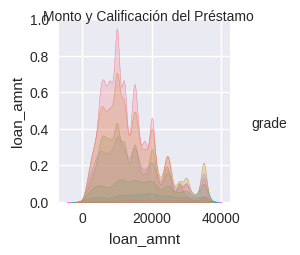

In [ ]:
# Pairplot Dispersión
loan_data_pairplot = loan_data[['grade','loan_amnt']]

# Pairplot de las variables
g = sns.pairplot(loan_data_pairplot, hue='grade')

g.fig.suptitle('Monto y Calificación del Préstamo', fontsize=10)

plt.show()

### Gráficos de Relación

#### Heatmap: Diagrama de Correlaciones

>💡 *Correlation does not imply Causation.*
―Someone somewhere



Un [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de ***correlaciones*** es un tipo de gráfico que se utiliza para visualizar la matriz de correlaciones entre múltiples variables en un conjunto de datos. En [Seaborn](https://seaborn.pydata.org/index.html), una librería de visualización de datos de Python, se pueden crear heatmaps de correlaciones utilizando la función **`heatmap()`**.

En un ***heatmap de correlaciones***, cada variable se representa en ambos ejes del gráfico, y se utiliza un ***gradiente de colores*** para representar el ***nivel de correlación*** entre ellas. Los valores de correlación más altos se representan con colores más brillantes, mientras que los valores de correlación más bajos se representan con colores más tenues.

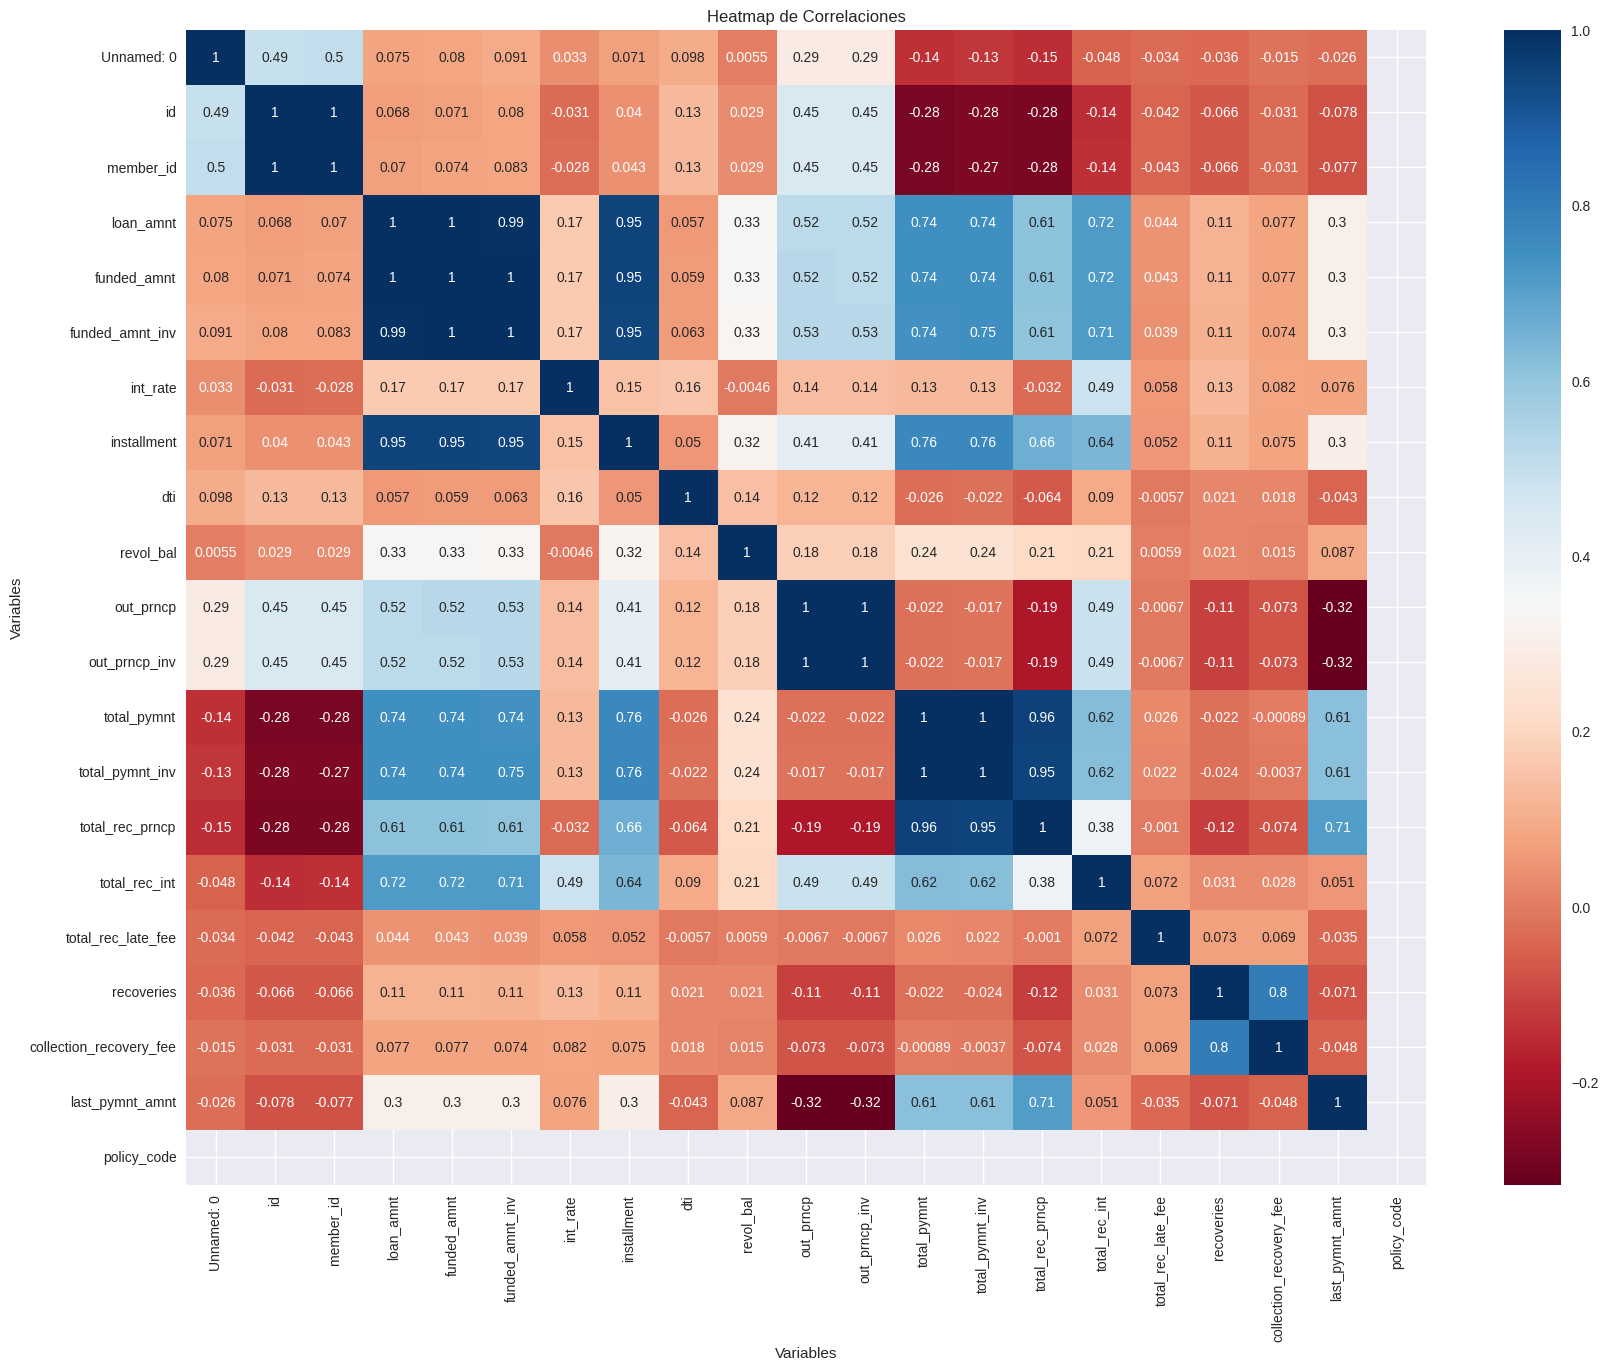

In [ ]:
# Heatmap de Correlaciones

#import seaborn as sns
#import matplotlib.pyplot as plt

# Selecciona solo las columnas con cero valores no nulos
loan_data_numeric_sub = loan_data_numeric.loc[:, loan_data_numeric.isnull().sum() == 0]

# Calcula la matriz de correlaciones
corr_matrix = loan_data_numeric_sub.corr()

# Crea el heatmap con la paleta de colores personalizada
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap="RdBu", annot=True)

# Añade título y etiquetas
plt.title('Heatmap de Correlaciones', fontsize=12)
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()


### Gráficos de Distribución

[Catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) es una función de alto nivel de la ***librería Seaborn*** que permite crear diferentes tipos de gráficos categóricos, como boxplots, violín plots, count plots y otros, en una sola línea de código. En otras palabras, **catplot** es una herramienta que facilita la creación de gráficos categóricos y que permite personalizarlos para adaptarse a diferentes necesidades.

El argumento **kind="box"** en catplot permite crear un ***boxplot*** para cada valor de una variable categórica. Mientras que **kind="violin"** permite crear un ***violin plot***.

#### Catplot: Boxplot

Un [Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) es un tipo de gráfico que muestra la distribución de una variable numérica a través de cinco estadísticos clave:

*  la mediana,

*  el primer cuartil (Q1),

*  el tercer cuartil (Q3) y

*  los valores mínimo y máximo.


El boxplot utiliza un rectángulo para representar la distribución de los datos, donde la ***altura*** del rectángulo representa el ***rango intercuartil*** (IQR = Q3 - Q1) y la ***línea*** dentro del rectángulo representa la ***mediana***. Las líneas que se extienden desde el rectángulo, conocidas como bigotes, representan los valores mínimo y máximo que no son valores atípicos.


Los ***valores atípicos (outliers)*** se representan como puntos individuales más allá de los bigotes. Es una herramienta útil para visualizar rápidamente la distribución y la dispersión de una variable numérica y para identificar valores atípicos o extremos.

In [ ]:
# Valores Únicos
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Para entender estas categorías:

*  **Current**: Es un crédito en estado ***vigente sin atrasos***, es decir, al corriente en sus pagos.

*  **Default**: Es un crédito en estado ***vencido***, lo que implica que su grade puede ser D, E, F, o G. Es decir, el cliente dejó de pagar

*  **Late (16-30 days)**: Es un crédito ***vigente con atrasos*** de entre 16 y 30 días.

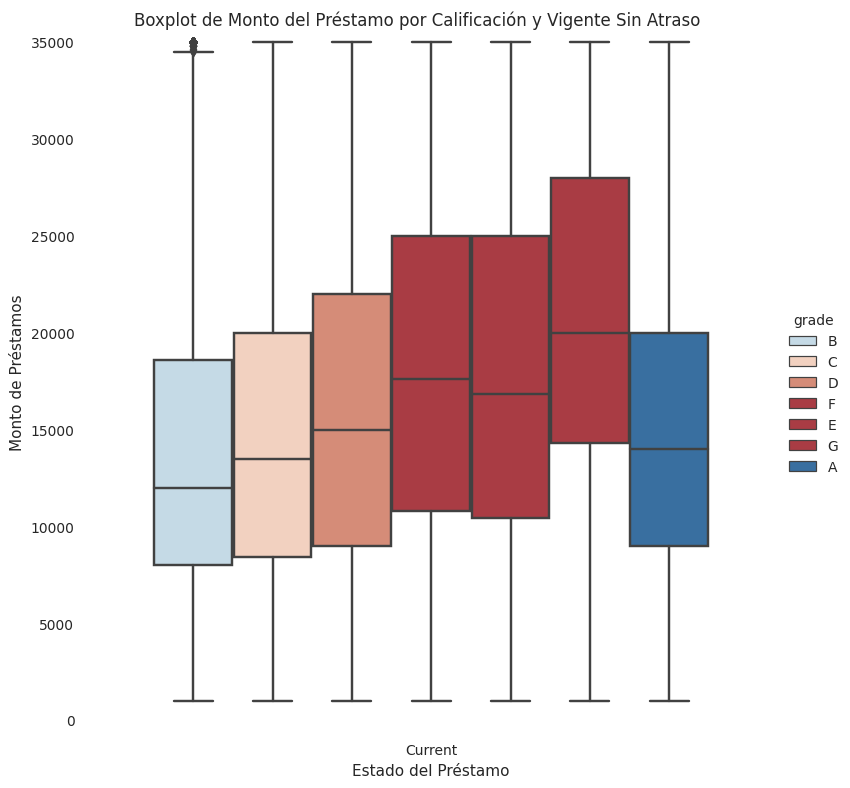

In [ ]:
# Catplot: Boxplot
#import seaborn as sns
#import matplotlib.pyplot as plt

# Definir el diccionario de colores personalizados
color_dict = {'A': '#2870B1', 'B': '#C0DCEB', 'C': '#FBCEB7', 'D': '#E58368',
              'E': '#BB2A34', 'F': '#BB2A34', 'G': '#BB2A34'}

# Configurar el estilo de los gráficos
sns.set_style('white')

# Filtrar el dataframe para incluir solamente los valores "Current" y "Charged Off"
loan_data_filtered = loan_data[loan_data['loan_status'].isin(['Current'])]

# Crear el gráfico de boxplot con la función catplot
g = sns.catplot(data=loan_data_filtered, x="loan_status", y="loan_amnt", hue="grade", kind="box", height=8, palette=color_dict)

# Añadir etiquetas y título
g.set_axis_labels("Estado del Préstamo", "Monto de Préstamos")
g.fig.suptitle('Boxplot de Monto del Préstamo por Calificación y Vigente Sin Atraso', fontsize=12)

plt.show()



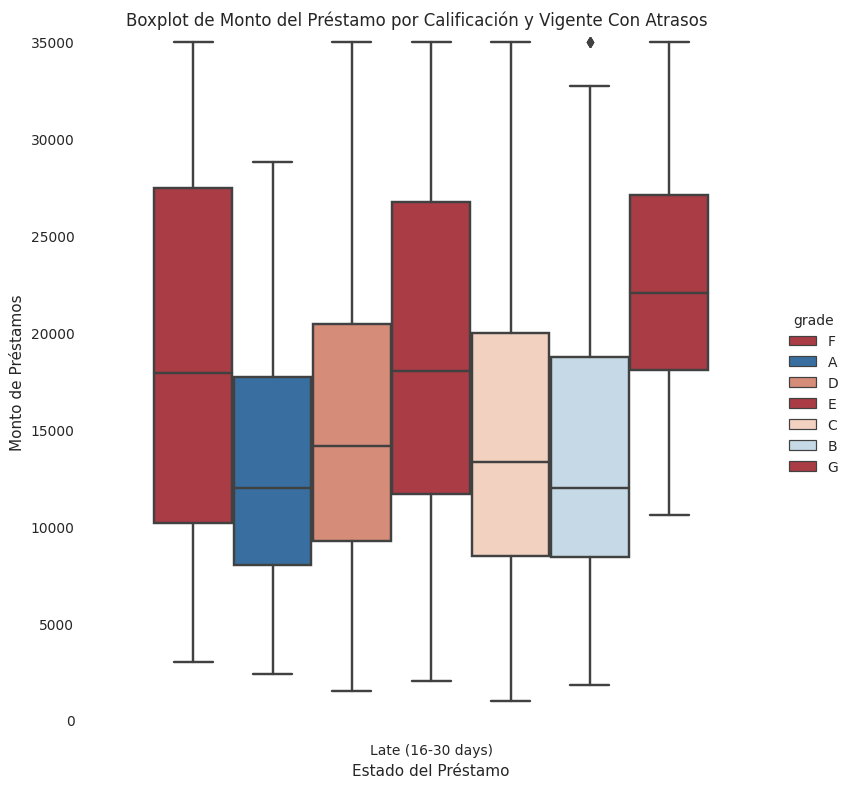

In [ ]:
# Catplot: Boxplot
#import seaborn as sns
#import matplotlib.pyplot as plt

# Definir el diccionario de colores personalizados
color_dict = {'A': '#2870B1', 'B': '#C0DCEB', 'C': '#FBCEB7', 'D': '#E58368',
              'E': '#BB2A34', 'F': '#BB2A34', 'G': '#BB2A34'}

# Configurar el estilo de los gráficos
sns.set_style('white')

# Filtrar el dataframe para incluir solamente los valores "Current" y "Charged Off"
loan_data_filtered = loan_data[loan_data['loan_status'].isin(['Late (16-30 days)'])]

# Crear el gráfico de boxplot con la función catplot
g = sns.catplot(data=loan_data_filtered, x="loan_status", y="loan_amnt", hue="grade", kind="box", height=8, palette=color_dict)

# Añadir etiquetas y título
g.set_axis_labels("Estado del Préstamo", "Monto de Préstamos")
g.fig.suptitle('Boxplot de Monto del Préstamo por Calificación y Vigente Con Atrasos', fontsize=12)

plt.show()

#### Catplot: Violin Plot

Un [Violin Plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) es un tipo de gráfico que muestra la distribución de una variable numérica a través de una representación de la densidad de probabilidad.


El gráfico utiliza una forma de violín para mostrar la distribución, donde el ***ancho*** del violín representa la ***densidad*** de la distribución en cada punto y las ***líneas*** en el interior del violín representan la ***mediana*** y los ***cuartiles***.


Es una herramienta útil para ***visualizar la forma y la dispersión*** de la distribución de una variable numérica y para comparar varias distribuciones entre sí.

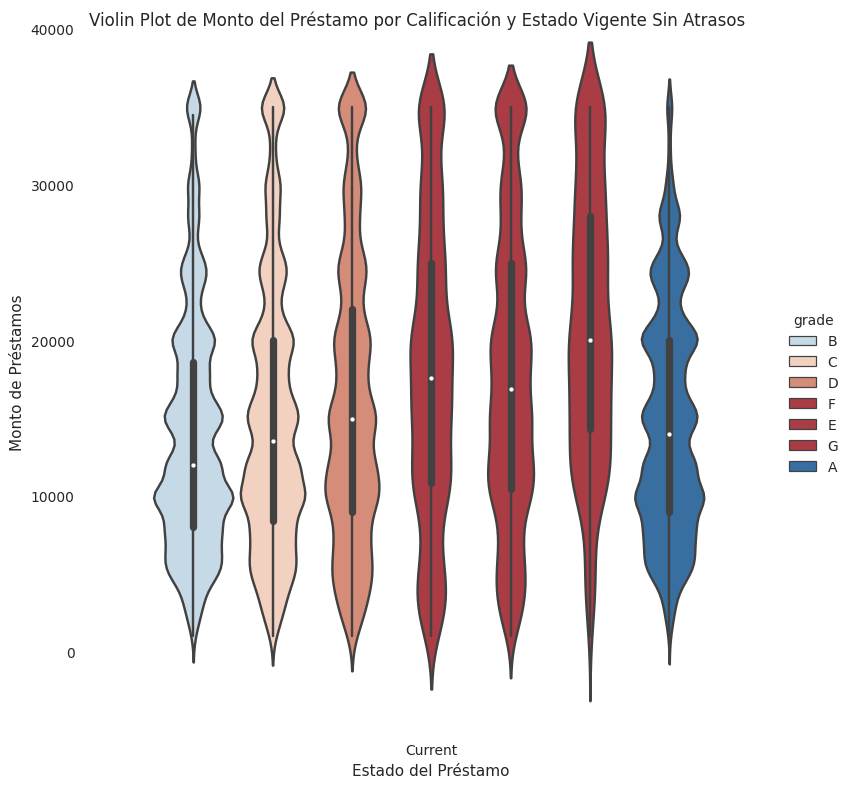

In [ ]:
# Catplot: Violin Plot
#import seaborn as sns
#import matplotlib.pyplot as plt

# Definir el diccionario de colores personalizados
color_dict = {'A': '#2870B1', 'B': '#C0DCEB', 'C': '#FBCEB7', 'D': '#E58368',
              'E': '#BB2A34', 'F': '#BB2A34', 'G': '#BB2A34'}

# Configurar el estilo de los gráficos
sns.set_style('white')

# Filtrar el dataframe para incluir solamente los valores "Current" y "Charged Off"
loan_data_filtered = loan_data[loan_data['loan_status'].isin(['Current'])]

# Crear el gráfico de boxplot con la función catplot
g = sns.catplot(data=loan_data_filtered, x="loan_status", y="loan_amnt", hue="grade", kind="violin", height=8, palette=color_dict)

# Añadir etiquetas y título
g.set_axis_labels("Estado del Préstamo", "Monto de Préstamos")
g.fig.suptitle('Violin Plot de Monto del Préstamo por Calificación y Estado Vigente Sin Atrasos', fontsize=12)

plt.show()

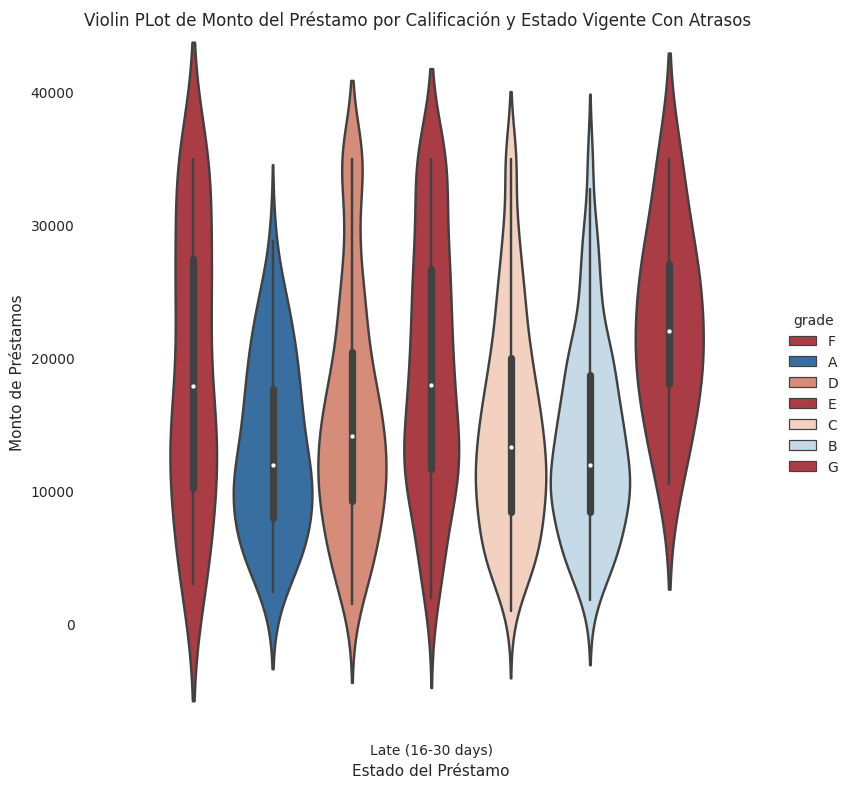

In [ ]:
# Catplot: Violin Plot
#import seaborn as sns
#import matplotlib.pyplot as plt

# Definir el diccionario de colores personalizados
color_dict = {'A': '#2870B1', 'B': '#C0DCEB', 'C': '#FBCEB7', 'D': '#E58368',
              'E': '#BB2A34', 'F': '#BB2A34', 'G': '#BB2A34'}

# Configurar el estilo de los gráficos
sns.set_style('white')

# Filtrar el dataframe para incluir solamente los valores "Current" y "Charged Off"
loan_data_filtered = loan_data[loan_data['loan_status'].isin(['Late (16-30 days)'])]

# Crear el gráfico de boxplot con la función catplot
g = sns.catplot(data=loan_data_filtered, x="loan_status", y="loan_amnt", hue="grade", kind="violin", height=8, palette=color_dict)

# Añadir etiquetas y título
g.set_axis_labels("Estado del Préstamo", "Monto de Préstamos")
g.fig.suptitle('Violin PLot de Monto del Préstamo por Calificación y Estado Vigente Con Atrasos', fontsize=12)

plt.show()

## Geopandas

![](https://raw.githubusercontent.com/vbleal/08MBID---Visualizacion-de-Datos/main/TP/Imag/GeoPandas/Geopandas_logo.png)

[GeoPandas](https://geopandas.org/en/stable/) es una librería de Python que permite trabajar con datos geoespaciales de manera sencilla y eficiente.

***Geopandas*** combina la funcionalidad de [Pandas](https://pandas.pydata.org/), una librería popular de manipulación de datos en Python, con herramientas para el manejo de datos geoespaciales, lo que facilita la manipulación y análisis de datos geográficos.

Con ***Geopandas***, los usuarios pueden leer y escribir datos geoespaciales en diferentes formatos, como [shapefiles](https://desktop.arcgis.com/es/arcmap/latest/manage-data/shapefiles/what-is-a-shapefile.htm), [GeoJSON](https://geojson.org/) y archivos de texto. Además, pueden realizar operaciones de geoprocesamiento, como la unión espacial, el cálculo de áreas y distancias, la creación de buffers y la generación de mapas temáticos.

### Mapas de Concentración Geográfica

Los ***mapas de concentración geográfica*** en riesgo de crédito se utilizan para visualizar la distribución geográfica de los préstamos y las pérdidas crediticias en una cartera de crédito.

Estos mapas pueden ser útiles para identificar áreas geográficas donde los préstamos tienen una mayor probabilidad de no ser pagados o incumplidos, lo que puede ayudar a los analistas de riesgo a tomar decisiones informadas sobre la gestión de riesgos crediticios.

El siguiente código permite visualizar la concentración geográfica del monto de los préstamos (**`loan_amnt`**) del dataframe **`loan_data`**.

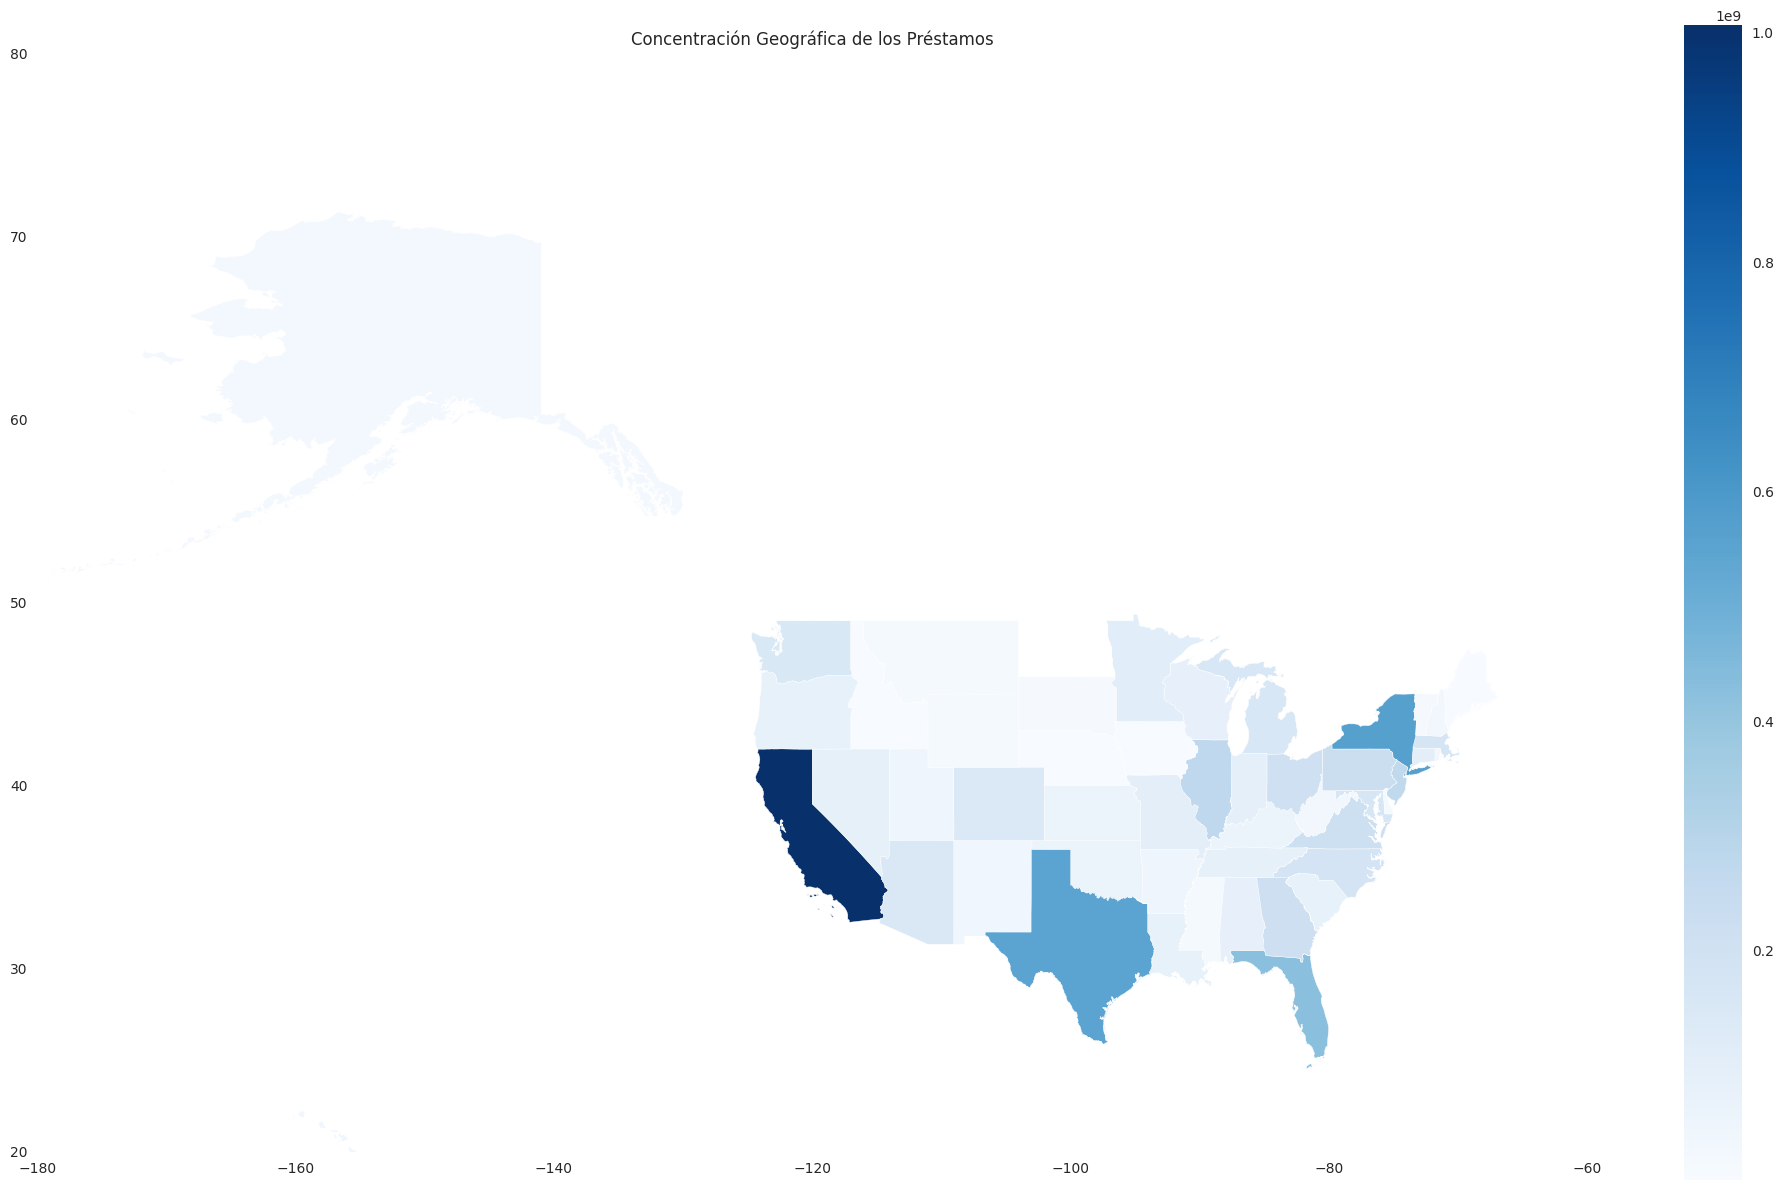

In [ ]:
# Geopandas
#import geopandas as gpd
#import pandas as pd
#import matplotlib.pyplot as plt

#mapa_usa = gpd.read_file("/content/drive/MyDrive/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
#loan_data = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv', header=0, encoding='UTF-8')

# Agrupar por 'addr_state' y sumar los montos de los créditos ('loan_amnt') por estado
suma_monto_creditos_estado = loan_data.groupby(['addr_state'])['loan_amnt'].sum().reset_index().rename(columns={"addr_state": "STUSPS", "loan_amnt": "loan_amnt_total"})

usa = mapa_usa.merge(suma_monto_creditos_estado, on="STUSPS")

fig, ax = plt.subplots(figsize=(25, 15))
usa.plot(column="loan_amnt_total", cmap="Blues", ax=ax, legend=True)
ax.set_xlim(-180, -60) # Especificar el rango de valores para el eje X
ax.set_ylim(20, 80) # Especificar el rango de valores para el eje Y
plt.title(f"Concentración Geográfica de los Préstamos")
plt.show()


En la práctica (no necesariamente con mapas), resulta muy útil saber cómo está concentrada geográficamente la cartera de crédito con base en su calificación.

**Concentración Préstamos con Calificación A**

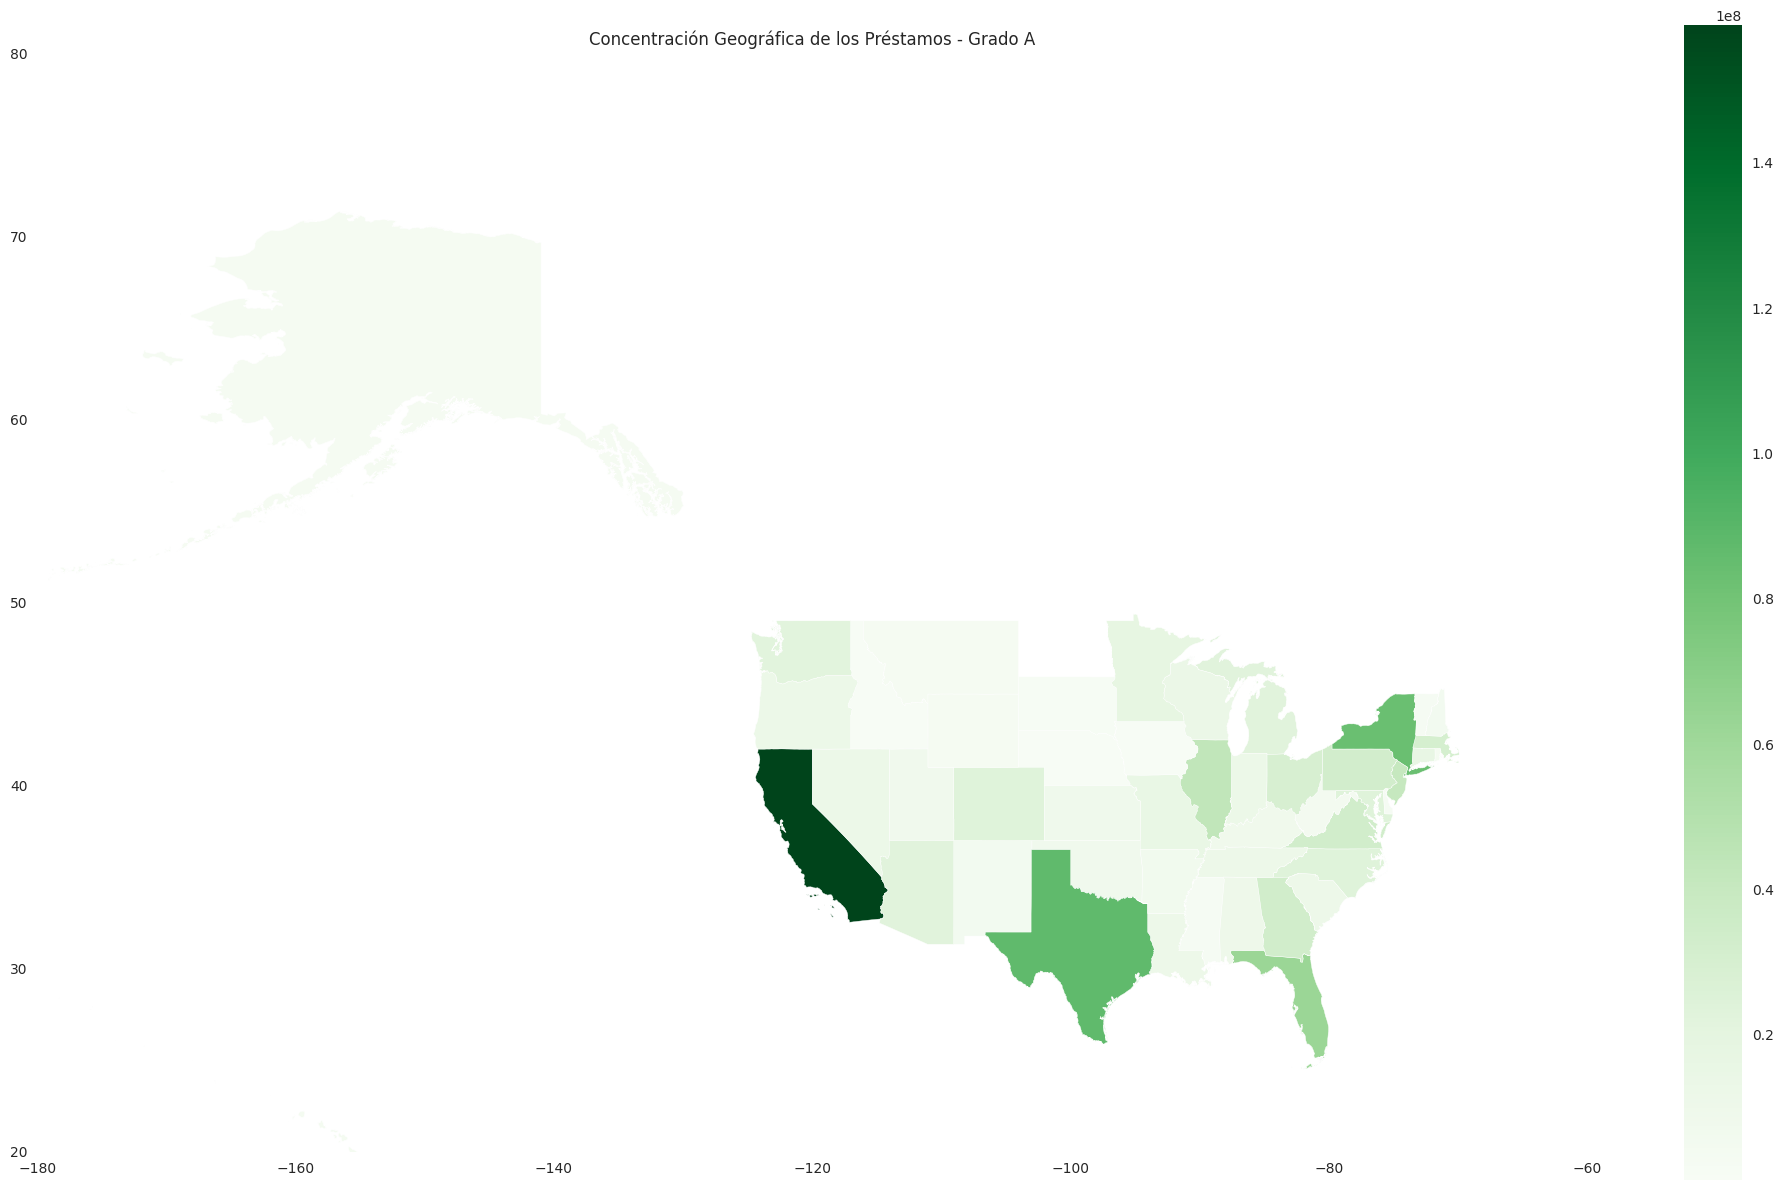

In [ ]:
# GeoPandas
#import geopandas as gpd
#import pandas as pd
#import matplotlib.pyplot as plt

#mapa_usa = gpd.read_file("/content/drive/MyDrive/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
#loan_data = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv', header=0, encoding='UTF-8')

# Filtrar los datos por grade = A
loan_data_A = loan_data[loan_data['grade'] == 'A']

# Agrupar por 'addr_state' y sumar los montos de los créditos ('loan_amnt') por estado
suma_monto_creditos_estado = loan_data_A.groupby(['addr_state'])['loan_amnt'].sum().reset_index().rename(columns={"addr_state": "STUSPS", "loan_amnt": "loan_amnt_total"})

usa = mapa_usa.merge(suma_monto_creditos_estado, on="STUSPS")

fig, ax = plt.subplots(figsize=(25, 15))
usa.plot(column="loan_amnt_total", cmap="Greens", ax=ax, legend=True)
ax.set_xlim(-180, -60) # Especificar el rango de valores para el eje X
ax.set_ylim(20, 80) # Especificar el rango de valores para el eje Y
plt.title(f"Concentración Geográfica de los Préstamos - Grado A")
plt.show()


**Concentración Préstamos con Calificación C**

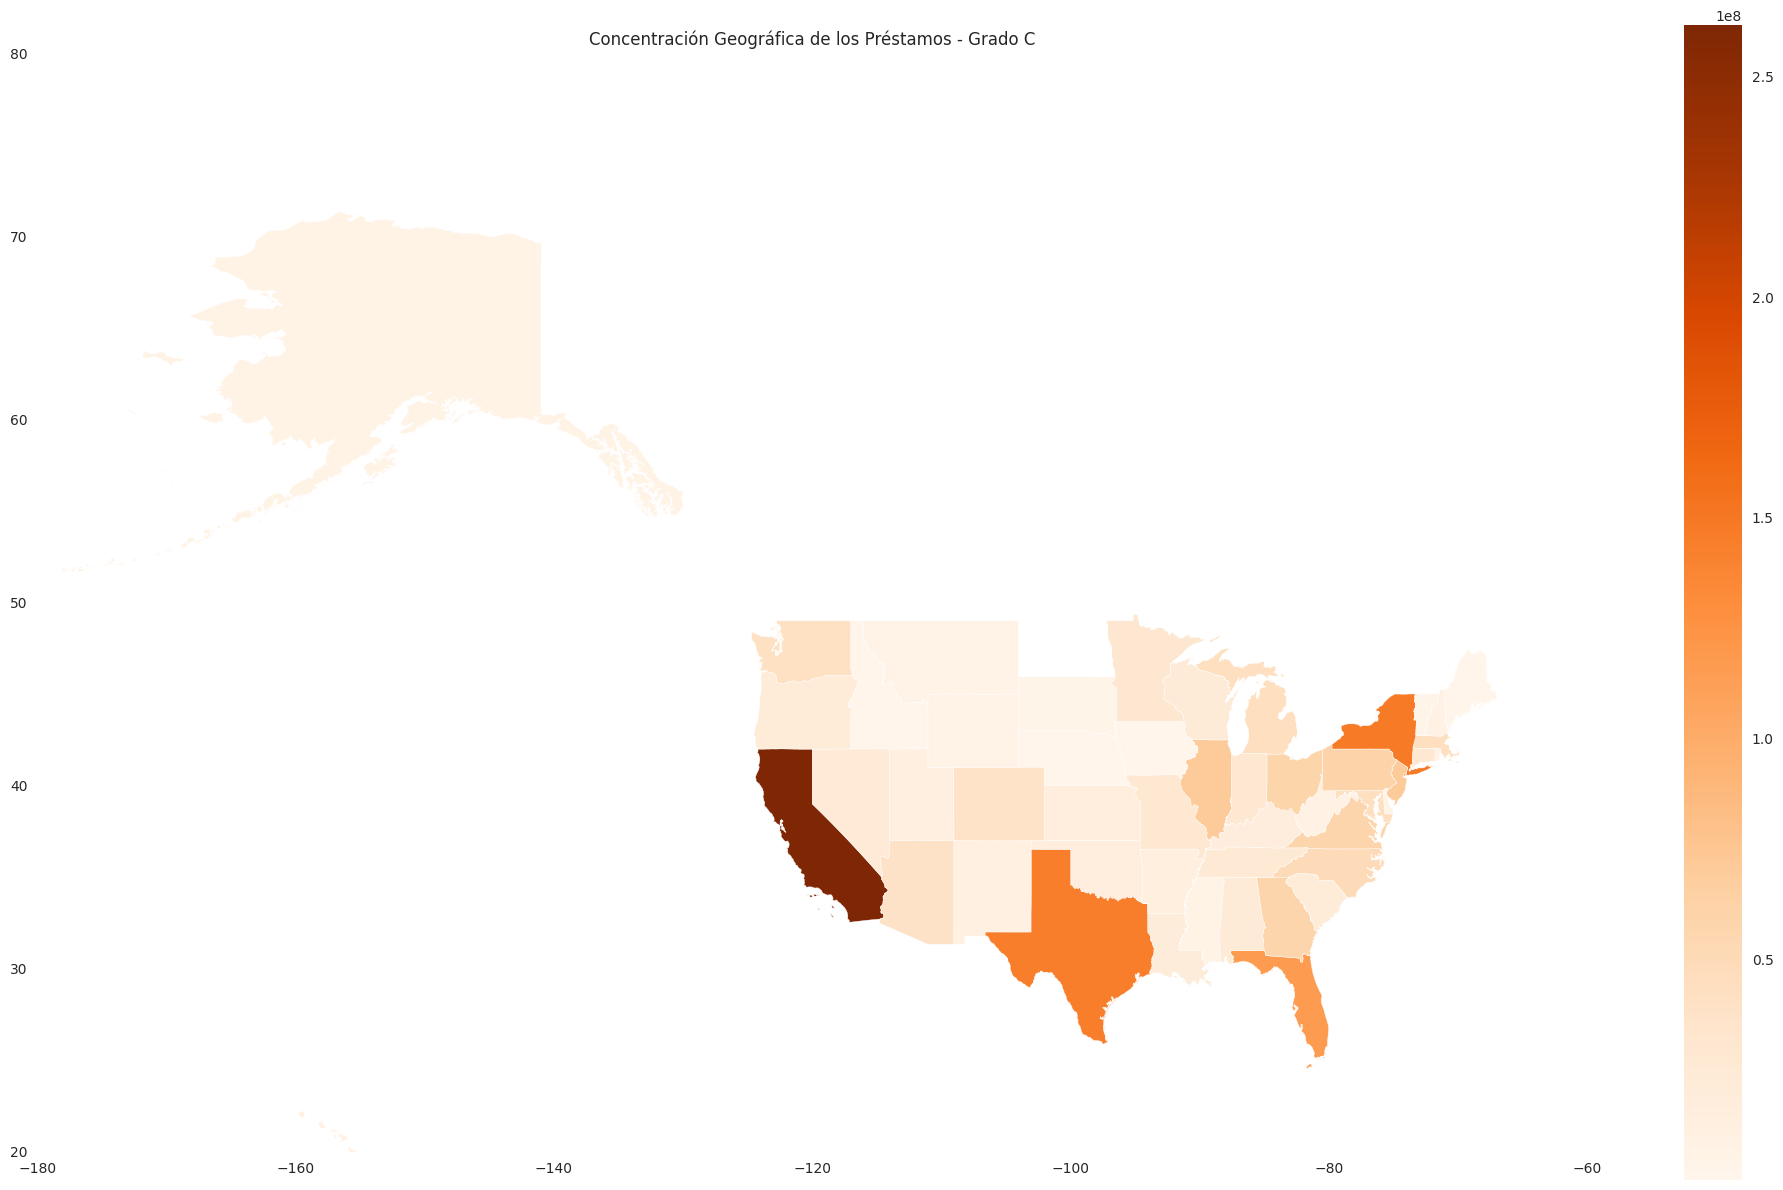

In [ ]:
# GeoPandas
#import geopandas as gpd
#import pandas as pd
#import matplotlib.pyplot as plt

#mapa_usa = gpd.read_file("/content/drive/MyDrive/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
#loan_data = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv', header=0, encoding='UTF-8')

# Filtrar los datos por grade = C
loan_data_C = loan_data[loan_data['grade'] == 'C']

# Agrupar por 'addr_state' y sumar los montos de los créditos ('loan_amnt') por estado
suma_monto_creditos_estado_C = loan_data_C.groupby(['addr_state'])['loan_amnt'].sum().reset_index().rename(columns={"addr_state": "STUSPS", "loan_amnt": "loan_amnt_total"})

usa = mapa_usa.merge(suma_monto_creditos_estado_C, on="STUSPS")

fig, ax = plt.subplots(figsize=(25, 15))
usa.plot(column="loan_amnt_total", cmap="Oranges", ax=ax, legend=True)
ax.set_xlim(-180, -60) # Especificar el rango de valores para el eje X
ax.set_ylim(20, 80) # Especificar el rango de valores para el eje Y
plt.title(f"Concentración Geográfica de los Préstamos - Grado C")
plt.show()

**Concentración Préstamos con Calificación D**

Número de préstamos de grado D: 76888
Monto total de préstamos de grado D: 1158095575


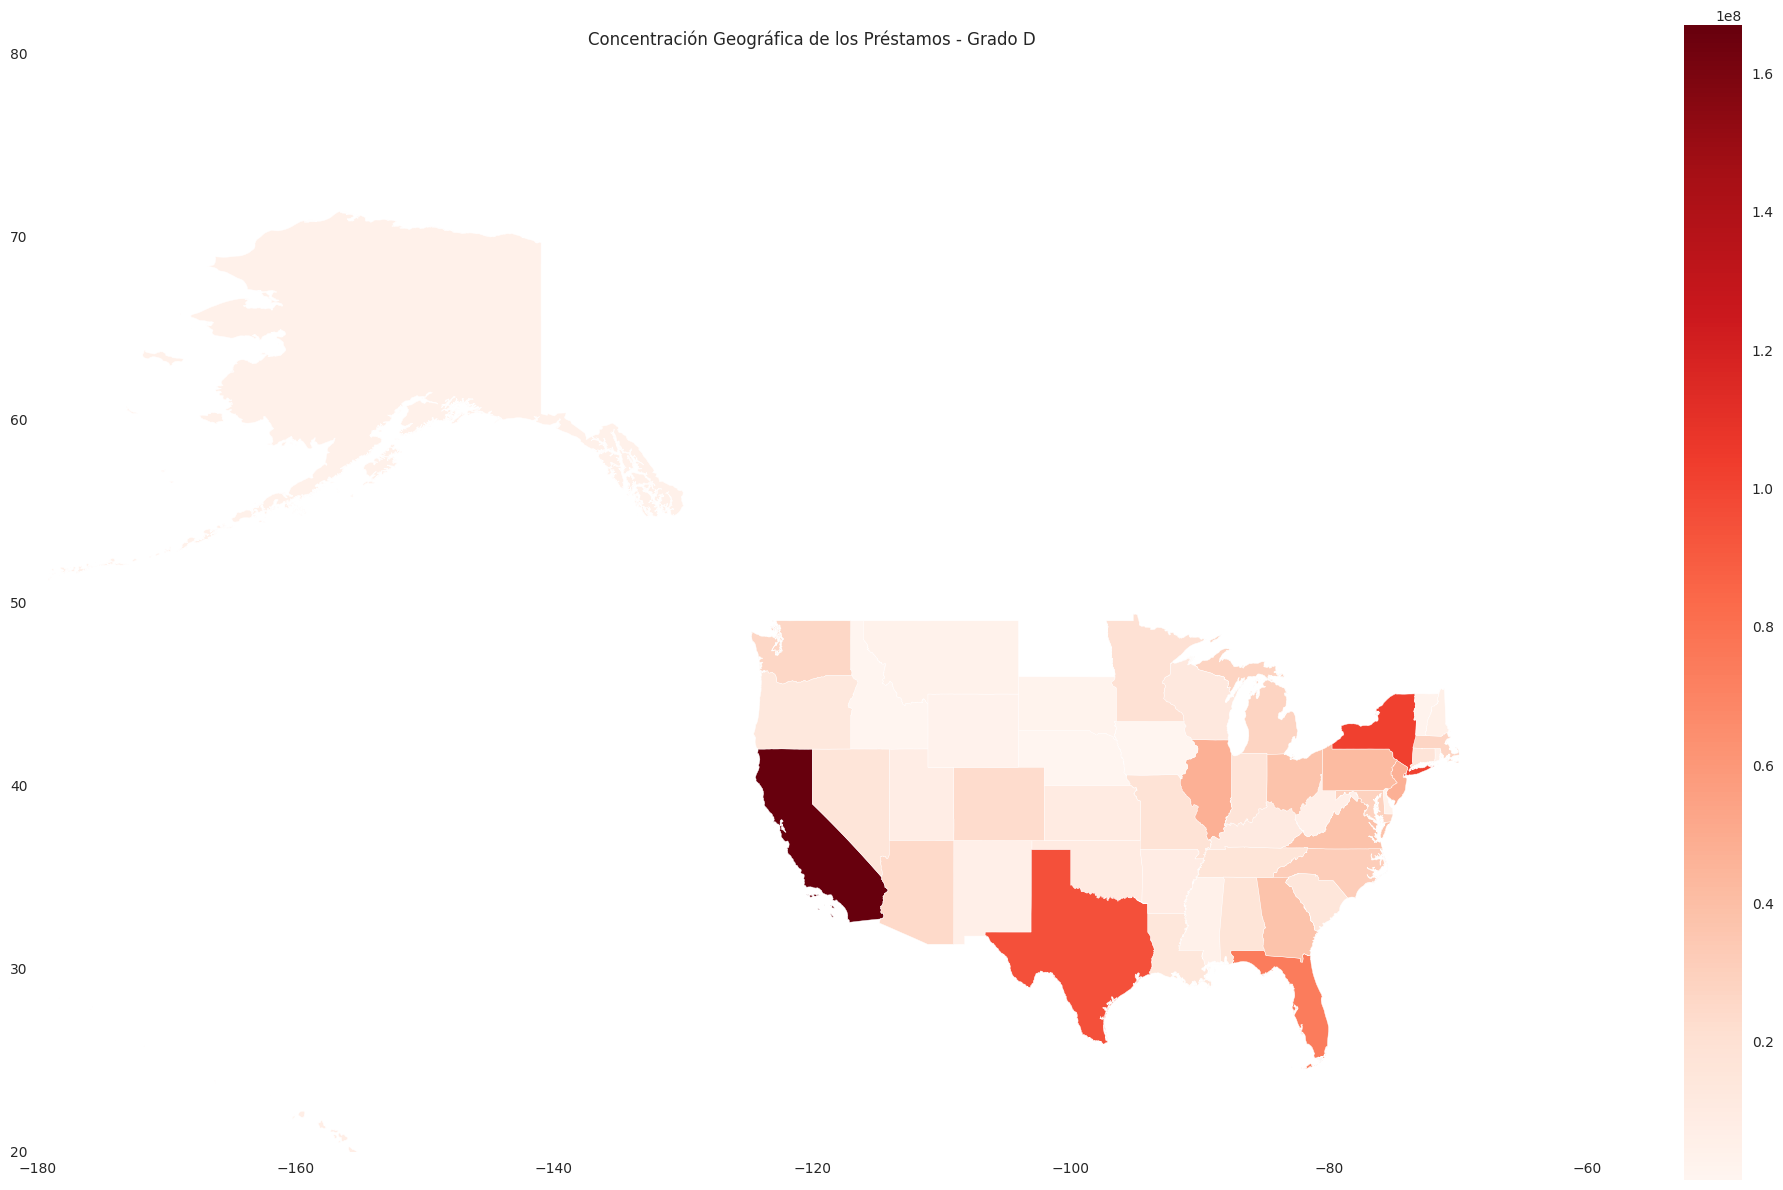

In [ ]:
# GeoPandas
#import geopandas as gpd
#import pandas as pd
#import matplotlib.pyplot as plt

#mapa_usa = gpd.read_file("/content/drive/MyDrive/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
#loan_data = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv', header=0, encoding='UTF-8')

# Filtrar los datos por grade = D
loan_data_D = loan_data[loan_data['grade'] == 'D']

# Imprimir información sobre la cantidad de préstamos de grado D y el monto total de los préstamos de grado D
print(f"Número de préstamos de grado D: {len(loan_data_D)}")
print(f"Monto total de préstamos de grado D: {loan_data_D['loan_amnt'].sum()}")

# Agrupar por 'addr_state' y sumar los montos de los créditos ('loan_amnt') por estado
suma_monto_creditos_estado_D = loan_data_D.groupby(['addr_state'])['loan_amnt'].sum().reset_index().rename(columns={"addr_state": "STUSPS", "loan_amnt": "loan_amnt_total_D"})

usa = mapa_usa.merge(suma_monto_creditos_estado_D, on="STUSPS")

fig, ax = plt.subplots(figsize=(25, 15))
usa.plot(column="loan_amnt_total_D", cmap="Reds", ax=ax, legend=True)
ax.set_xlim(-180, -60) # Especificar el rango de valores para el eje X
ax.set_ylim(20, 80) # Especificar el rango de valores para el eje Y
plt.title(f"Concentración Geográfica de los Préstamos - Grado D")
plt.show()


In [ ]:
vigentes_D = loan_data[(loan_data['grade'] == 'D') & (loan_data['loan_status'] == 'Current')]


In [ ]:
vigentes_D.head(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line
61,61,1068934,1277395,17500,8950,8925.00000,60 months,17.27,223.74,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2006-05-01,139.0
86,86,1063958,1297940,14000,14000,13975.00000,60 months,17.27,349.98,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2005-07-01,149.0
101,101,1034693,1264291,16000,16000,16000.00000,60 months,17.58,402.65,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1996-10-01,254.0
192,192,1067266,1301634,8400,8400,8150.00000,60 months,16.77,207.73,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2003-09-01,171.0
217,217,1066664,1300858,21000,11800,11500.00000,60 months,17.27,294.98,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1973-12-01,528.0
218,218,1066659,1300852,16000,16000,16000.00000,60 months,17.27,399.97,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2001-05-01,199.0
242,242,1064063,1296651,18825,18825,18800.00000,60 months,17.58,473.75,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2000-01-01,215.0
335,335,1059734,1291550,20000,20000,18626.34674,60 months,16.77,494.59,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1995-03-01,273.0
391,391,1064585,1298397,15700,15700,14931.30970,60 months,18.25,400.82,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1999-12-01,216.0
436,436,1064094,1296684,6000,6000,6000.00000,60 months,17.58,151.00,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2003-11-01,169.0


---
## Plotly
---

![](https://raw.githubusercontent.com/vbleal/08MBID---Visualizacion-de-Datos/main/TP/Imag/Plotly/Plotly_logo.png)

[Plotly](https://plotly.com/) es una librería de Python para la visualización de datos interactivos en la web. Permite crear gráficos y visualizaciones de datos sofisticados y personalizados que pueden ser compartidos y visualizados en línea.



### Sankey Diagram

Un  [Sankey Diagram](https://www.data-to-viz.com/graph/sankey.html) es un tipo de ***diagrama de flujo*** que representa la magnitud del flujo entre diferentes nodos o elementos. El ancho de las líneas que conectan los nodos en un Sankey diagrama es proporcional al flujo o cantidad de datos que se está representando. Por lo tanto, este tipo de gráfico es muy útil para visualizar el flujo de recursos, energía, dinero o cualquier otro tipo de flujo cuantitativo entre diferentes elementos.

Un ***Sankey Diagram*** típicamente consta de ***nodos y enlaces***. Los nodos representan los diferentes elementos o categorías que se están analizando y los enlaces representan el flujo o cantidad de datos que se mueve entre ellos. Cada nodo se ubica en una posición en el eje vertical, y su altura se ajusta para que la línea que la conecta con otro nodo sea lo más recta posible. Además, la anchura de la línea que conecta los nodos se utiliza para representar la cantidad de datos que fluye entre ellos.

**Grade y Loan Status**

In [ ]:
# Librerías
!pip install plotly>=4.0.0


In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'


In [ ]:
import plotly.graph_objects as go


In [ ]:
# Conexión a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar Dataset desde Google Drive
loan_data_backup = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv', header=0, encoding='UTF-8')
loan_data = loan_data_backup.copy()

<ipython-input-11-2b1aaff60b44>:2: DtypeWarning:

Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
# Preparar los datos para el diagrama de Sankey
source = []
target = []
value = []

In [ ]:
# Relacionar 'grade' con 'loan_status' y calcular el conteo de préstamos en cada combinación
grouped_data = loan_data.groupby(['grade', 'loan_status']).size().reset_index(name='count')
for i, row in grouped_data.iterrows():
    source.append(row['grade'])
    target.append(row['loan_status'])
    value.append(row['count'])


In [ ]:
# Crear una lista única de etiquetas para las variables
labels = list(set(source + target))

In [ ]:
# Grafica Diagrama Sankey
def get_color(label, color_dict, default_color='gray'):
    return color_dict.get(label, default_color)

color_dict = {
    'A': 'darkblue',
    'B': '#287081',
    'C': 'lightblue',
    'D': '#F6F7F7',
    'E': 'yellow',
    'F': 'orange',
    'G': 'red',
    'Fully Paid': 'mediumseagreen',
    'Charged Off': 'indianred',
    'Current': '#68ABD0',
    'Late (31-120 days)': 'gold',
    'In Grace Period': 'lightskyblue',
    'Late (16-30 days)': 'lightcoral',
    'Default': 'black'
}

colors = [get_color(label, color_dict) for label in labels]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=[labels.index(s) for s in source],
        target=[labels.index(t) for t in target],
        value=value,
    )
)])

fig.update_layout(title_text='Diagrama de Sankey: Grade & Loan Status', font_size=10)
fig.show()


In [ ]:
# Generar HTML
pio.write_html(fig, file='sankey_diagram.html', auto_open=True)


In [ ]:
# Guardar el diagrama Sankey en Google Drive
output_file_path = '/content/drive/MyDrive/sankey_diagram.html'
pio.write_html(fig, file=output_file_path, auto_open=True)


---
## Plotly Express
---

[Plotly Express](https://plotly.com/python/plotly-express/)  es una biblioteca de visualización de datos de alto nivel para Python, construida sobre la biblioteca [Plotly](https://plotly.com/).

Ofrece una interfaz simple y fácil de usar para crear rápidamente gráficos interactivos y atractivos con sólo unas pocas líneas de código.

***Plotly Express*** es parte del ecosistema Plotly y es la manera recomendada de crear la mayoría de las visualizaciones comunes en Plotly.

Para comenzar a usar Plotly Express, bastará con instalar la biblioteca **`plotly`** y luego importa **`poltly.express`** de la siguiente manera:



```python
import plotly.express as px

```



### Sunburst Chart

El [Sunburst Chart](https://plotly.com/python/sunburst-charts/) es útil para explorar y analizar estructuras de datos jerárquicos y para mostrar proporciones relativas de diferentes categorías en cada nivel de la jerarquía.

Es especialmente útil cuando se trata de grandes conjuntos de datos con múltiples niveles de categorización.

In [ ]:
# Conexión a Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar Dataset desde Google Drive
#loan_data_backup = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv', header=0, encoding='UTF-8')
#loan_data = loan_data_backup.copy()

<ipython-input-6-2b1aaff60b44>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv', header=0, encoding='UTF-8')


In [ ]:
#!pip install pandas plotly
#import pandas as pd
#import plotly.express as px
import plotly.express as px

In [ ]:
# Sunburst
# Cargar Dataframe
#loan_data

# Agrupamos los datos según la jerarquía deseada y calculamos el tamaño de cada grupo
grouped_data = loan_data.groupby(['loan_status', 'grade', 'addr_state']).size().reset_index(name='count')

# Define la paleta de colores personalizada
color_mapping = {'A': '#2870B1', 'B': '#C0DCEB', 'C': '#FBCEB7', 'D': '#E58368',
                 'E': '#BB2A34', 'F': '#BB2A34', 'G': '#BB2A34'}

# Creamos el gráfico Sunburst
fig = px.sunburst(
    grouped_data,
    path=['loan_status', 'grade', 'addr_state'], # Define la jerarquía
    values='count', # Define el tamaño de cada sector
    color='grade', # Define el color de cada sector según el "grade"
    color_discrete_map=color_mapping, # Asigna la paleta de colores personalizada
    title='Sunburst Chart: Loan Status, Grade y Addr State'
)

# Muestra el gráfico
fig.show()



---
## Dash
---

![](https://raw.githubusercontent.com/vbleal/08MBID---Visualizacion-de-Datos/main/TP/Imag/Dash/Plotly_Dash_logo.png)

[Dash](https://dash.plotly.com/) es un framework de Python que permite crear aplicaciones web interactivas y personalizadas para visualizar y analizar datos. Es desarrollado por [Plotly](https://plotly.com/).

Dash se basa en las librerías de Plotly para crear visualizaciones interactivas y utiliza [Flask](https://flask.palletsprojects.com/en/2.3.x/), una librería de Python para la creación de aplicaciones web, como su motor de servidor. Con Dash, los usuarios pueden crear aplicaciones web que incluyan gráficos interactivos, tablas, texto, controles de entrada y otros elementos de la interfaz de usuario.

A continuación, se explica cómo ejecutar y visualizar Dash. El gráfico tendrá la opción [Dropdown](https://dash.plotly.com/dash-core-components/dropdown), la cual es muy solicitada en la mayoría de los dashboards.

### Aplicación Dash con Dropdown

In [ ]:
# Librerías
#!pip install plotly>=4.0.0


In [ ]:
#import plotly.io as pio
#pio.renderers.default = 'colab'


In [ ]:
# Instalación
!pip install dash
!pip install dash-core-components
!pip install dash-html-components
!pip install jupyter-dash

# Para exponer la aplicación Dash a través de una URL pública
!pip install pyngrok


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19879 sha256=ca4aa81c514a25cace546f3ee293ac80d1a08b41c4820eaa18fe458d1a491cec
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


[Ngrok](https://ngrok.com/)

In [ ]:
# Importación
import pandas as pd
import plotly.express as px

from jupyter_dash import JupyterDash
#import dash_core_components as dcc # Deprecated
import dash_core_components as dcc
#import dash_html_components as html # Deprecated
import dash_html_components as html
from dash.dependencies import Input, Output

from pyngrok import ngrok


In [ ]:
# Crear la Aplicación Dash
app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': 'Loan Amount', 'value': 'loan_amnt'},
            {'label': 'Interest Rate', 'value': 'int_rate'},
            {'label': 'Annual Income', 'value': 'annual_inc'},
            {'label': 'Debt-to-Income Ratio', 'value': 'dti'}
        ],
        value='loan_amnt',
        placeholder="Selecciona una variable numérica"
    ),
    dcc.Graph(id='graph')
])


In [ ]:
# Función para Dropdown
@app.callback(
    Output('graph', 'figure'),
    [Input('dropdown', 'value')]
)
def update_graph(selected_value):
    fig = px.scatter(loan_data, x='id', y=selected_value, color='grade', title=f"{selected_value} vs ID")
    return fig


In [ ]:
# Ejecución de la Aplicación
# Ejecutar la aplicación Dash en un puerto específico
app.run_server(mode='external', host="localhost", port=8051, debug=True)

# Exponga la aplicación a través de ngrok y muestre la URL pública
public_url = ngrok.connect(8051)
print("Dash app running on:", public_url)


Dash is running on http://localhost:8051/



INFO:dash.dash:Dash is running on http://localhost:8051/



Dash app running on:


<IPython.core.display.Javascript object>

Dash app running on: NgrokTunnel: "https://4e73-35-234-34-208.ngrok.io" -> "http://localhost:8051"


Deberá verse algo como esto:

![](https://raw.githubusercontent.com/vbleal/08MBID---Visualizacion-de-Datos/main/TP/Imag/Dash/Dash_app.jpg)

### Mapas

Se puede explorar la creación de mapas con Dash mediante el uso de [Códigos FIPS](https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_fips_master.csv).

Adicionalmente, se requerirá usar un ***token de mapbox***, por lo que se recomienda crear una cuenta personal en el sitio web: [Mapbox](https://www.mapbox.com/).

---
## Bokeh
---

[Bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html) es una librería de ***visualización interactiva*** de datos para Python que permite crear gráficos elegantes y personalizados en la web. Bokeh se enfoca en la construcción de gráficos interactivos, es decir, aquellos en los que los usuarios pueden interactuar con los datos presentados mediante herramientas interactivas y widgets.

**Bokeh** es especialmente útil para crear ***visualizaciones en la web*** que permiten la exploración de grandes conjuntos de datos. Puede generar gráficos interactivos en tiempo real, animaciones y widgets personalizados. Además, es fácil de integrar con otras herramientas de Python para el análisis de datos, como Pandas y NumPy.

**Bokeh** soporta una ***amplia gama de tipos de gráficos***, incluyendo diagramas de dispersión, diagramas de líneas, diagramas de barras, gráficos de áreas, mapas de calor, gráficos de redes, entre otros. También permite personalizar la apariencia de los gráficos con una gran cantidad de opciones de diseño y estilo.

In [ ]:
# Instalación
!pip install bokeh


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Color Scatter

[Color Scatter](https://docs.bokeh.org/en/2.4.3/docs/gallery/color_scatter.html) (o "***scatter de color***" en español) se refiere a un tipo de gráfico de dispersión (*scatter plot*) en el que cada punto se representa con un color diferente, según una variable categórica o discreta que se utiliza para codificar el color.

In [ ]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, CategoricalColorMapper, LogScale, Range1d
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
from bokeh.palettes import viridis


In [ ]:
# Importar Dataset desde Google Drive
#loan_data_backup = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv', header=0, encoding='UTF-8')
#loan_data = loan_data_backup.copy()


In [ ]:
print(loan_data[['annual_inc', 'loan_amnt']].describe())


         annual_inc      loan_amnt
count  4.662810e+05  466285.000000
mean   7.327738e+04   14317.277577
std    5.496357e+04    8286.509164
min    1.896000e+03     500.000000
25%    4.500000e+04    8000.000000
50%    6.300000e+04   12000.000000
75%    8.896000e+04   20000.000000
max    7.500000e+06   35000.000000


In [ ]:
# Color Scatter

# Preparar los datos para Bokeh
source = ColumnDataSource(loan_data)

# Crear una paleta de colores adecuada
num_grades = len(loan_data['grade'].unique())
color_palette = viridis(num_grades)

# Crear un mapeador de colores para la variable "grade"
color_mapper = CategoricalColorMapper(factors=list(loan_data['grade'].unique()), palette=color_palette)

# Configurar el gráfico de dispersión con escalas logarítmicas
p = figure(title='Annual Income vs Loan Amount by Grade', plot_width=800, plot_height=600, x_axis_type="log", y_axis_type="log")
p.xaxis.axis_label = 'Annual Income'
p.yaxis.axis_label = 'Loan Amount'

# Ajustar el rango de los ejes X e Y manualmente
p.x_range = Range1d(start=1e3, end=1e7)
p.y_range = Range1d(start=1e2, end=4e4)

# Agregar la serie de datos
p.scatter('annual_inc', 'loan_amnt', source=source, legend_field='grade', fill_color=factor_cmap('grade', palette=color_palette, factors=list(loan_data['grade'].unique())), fill_alpha=0.8, size=5)

# Mostrar el gráfico de dispersión
output_notebook()
show(p)



In [ ]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import CategoricalColorMapper
from bokeh.palettes import viridis

# Cargar el conjunto de datos


# Preparar los datos
N = len(loan_data)
x = loan_data['annual_inc']
y = loan_data['loan_amnt']
radii = np.random.random(size=N) * 1.5

# Crear una paleta de colores adecuada
num_grades = len(loan_data['grade'].unique())
color_palette = viridis(num_grades)

# Crear un mapeador de colores para la variable "grade"
color_mapper = CategoricalColorMapper(factors=list(loan_data['grade'].unique()), palette=color_palette)

# Asignar colores según el 'grade'
loan_data['color'] = loan_data['grade'].apply(lambda x: color_mapper.palette[color_mapper.factors.index(x)])
colors = loan_data['color'].tolist()

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

output_notebook()
show(p)



Output hidden; open in https://colab.research.google.com to view.

---
## Data Profiler
---

>💡 *It is a capital mistake to theorize before one has data.*
―Sherlock Holmes in “*A study in Scarlet*” by Arthur Conan Doyle


[Data Profiler](https://pypi.org/project/DataProfiler/) permite generar un reporte detallado del tipo ***Exploratory Data Analysis (EDA)*** de un dataset dado. Algunos de estos análisis son:

*  **Resumen Estadístico por Variable**

*  **Análisis Univariado: Histogramas**

*  **Análisis de Correlación**

*  **Análisis de Interacción entre Variables**

*  **Missing Values**

*  **Muestreo**



In [ ]:
# Instalación
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=c623a8c6ea305bd1f393f10a46f50375a8016ebec90294a8c13aacf8469c23f3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cec

### Profile Report

In [ ]:
from ydata_profiling import ProfileReport
print("ProfileReport importado")

ProfileReport importado


### Generación del Reporte HTML

  ⚠️ **Warning!**

La ejecución del ***Profile Report*** puede demorar de 10-15min, para el dataset **`loan_data`**.


In [ ]:
# Profile Report en HTMl del Dataset

reporte_loan_data = ProfileReport(loan_data, title="Profile Report: Loan Data")
reporte_loan_data.to_file("reporte_loan_data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Deberá verse algo como lo siguiente:

![](https://raw.githubusercontent.com/vbleal/08MBID---Visualizacion-de-Datos/main/TP/Imag/DataProfiling/Profile_Report_01.jpg)

![](https://raw.githubusercontent.com/vbleal/08MBID---Visualizacion-de-Datos/main/TP/Imag/DataProfiling/Profile_Report_02.jpg)

### Desventajas

Para ***datasets de gran tamaño*** como el de **`loan_data`**, el reporte HTML del Profile Report no suele tener un buen performance. De tal forma que, la interactividad con el mismo se vuelve lenta, y el usuario pierde el interés.

---
<a id="6"></a>
# 📜 **Conclusiones**
---

>💡 *Visualization gives you answers to questions you didn’t know you had.*
―Ben Shneiderman

El ***Riesgo de Crédito*** es un aspecto esencial en la gestión financiera, y los modelos de Probabilidad de Incumplimiento como los de Originación, Behavioral y Collection son herramientas fundamentales para abordarlo.

Y la ***Visualización de Datos***, como la representación geográfica de cartera con atrasos o alta probabilidad de incumplimiento, facilita el análisis y comprensión de los riesgos, permitiendo a las instituciones tomar decisiones informadas y optimizar sus estrategias de riesgo crediticio.

## Resultados

Se han mostrado visualizaciones con algunas de las herramientas más sobresalientes de la industria, a saber:

*  [Seaborn](https://seaborn.pydata.org/index.html)
   *  [Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

   *  [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de Correlaciones

   *  [Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

   *  [Violin Plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

*  [GeoPandas](https://geopandas.org/en/stable/)
   *  Mapa de Concentración Geográfica

*  [Plotly](https://plotly.com/)
   *  [Sankey Diagram](https://www.data-to-viz.com/graph/sankey.html)

*  [Plotly Express](https://plotly.com/python/plotly-express/)
   *  [Sunburst Chart](https://plotly.com/python/sunburst-charts/)

*  [Dash](https://dash.plotly.com/)-Plotly
   *  Aplicación con [Dropdown](https://dash.plotly.com/dash-core-components/dropdown)

*  [Bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html)
   *  [Color Scatter](https://docs.bokeh.org/en/2.4.3/docs/gallery/color_scatter.html)

*  [Data Profiler](https://pypi.org/project/DataProfiler/)
   *  Profile Report


## Trabajos Futuros

Existe en el mercado una extensa variedad de herramientas para el tratamiento y visualización de los datos.

Sin embargo, como podrá notarse en el presente notebook, muchos están orientados a una visualización tipo "***Business Intelligence***". Es decir, son gráficos donde se puede ver la evolución histórica de los datos y cómo se encuentran en el momento presente.

El punto es que, como Data Scientists, esto no es suficiente. Hay que enfocarse también en la predicción y la prescripción, a partir de modelos de Machine Learning, Deep Learning, Algoritmos Genéticos, etc. Esto podría explorarse a mayor profundidad en un trabajo futuro, tanto con algunas de las herramientas presentadas en este notebook, como otras adicionales.

---
<a id="7"></a>
# 📚 **Bibliografía**
---

1. [Berengueres, J. (2021)](https://www.amazon.com/-/es/Jose-Berengueres/dp/1085827836). ***Data viz: Principles, practice and Python code***. CRC Press.

2. Godoy, M. (2019). ***Data wrangling with Pandas and GeoPandas***. Recuperado de https://towardsdatascience.com/data-wrangling-with-pandas-and-geopandas-1e60f573aa80

3. Meurer, K. (2020). ***Mastering geospatial analysis with Python: Explore GIS processing and learn to work with GeoPandas, CARTOframes, and MapboxGL-Jupyter***. Packt Publishing.

4. McKinney, W. (2017). ***Python for data analysis: Data wrangling with Pandas, NumPy, and IPython***. O'Reilly Media.

5. O'Reilly Media. (2018). ***Bokeh: Visualizing data and creating interactive plots with Bokeh***. Recuperado de https://docs.bokeh.org/en/latest/

6. Pandas Profiling. (2020). ***Pandas profiling: Generate profile reports from a pandas DataFrame***. Recuperado de https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html

7. Plotly Technologies Inc. (2015). ***Getting started with Plotly in Python***. Recuperado de https://plotly.com/python/getting-started/

8. Ruocco, G. (2017). ***Data visualization with Python and JavaScript: Scrape, clean, explore & transform your data***. O'Reilly Media.

9. Shetty, A. (2018). ***Interactive data visualization with Python: Create engaging visualizations with Dash, Plotly, and Bokeh***. Packt Publishing.

10. VanderPlas, J. (2016). ***Python data science handbook: Essential tools for working with data***. O'Reilly Media.

11. Waskom, M. (2018). ***An introduction to seaborn***. Recuperado de https://seaborn.pydata.org/introduction.html
